## Problem Statement: 
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. 


## Steps taken for Lead Score Assignment

### 1. Importing relevant Libraries and Reading data
- Reading Data
### 2. Checking structure of data
- Checking shape, info and central tendencies of data
### 3. Data cleaning, missing values and  outliers
- Dropping skewed variables and Lead variables
- Combining categories with less data points into one category
- Converting Select into NaN
- Checking percentage of missing values in column
- Dropping variables with null values above 40% and Imbalanced variables
- Imputing missing values in categorical variables with Mode and numerical variables with Median
- Checking for outliers and outliers treatment
### 4. Exploratory Data Analysis
- Univariate
- Bivariate
### 5. Data Pre-processing
- Dummy encoding
### 6. Model Building
- Train, Test split
- Feature Scaling
- Dropping highly correlated variable
- Performing RFE
- Model Assessment
- Checking VIF
### 7. Model Evaluation
- Predicting X_train
- Plotting ROC curve
- Finding optimal cut-off
- Applying the selected optimal cut-off on X_train and checking metrics
### 8. Predicting the Test Data
- Predicting X_test
- Applying the selected optimal cut-off and checking metrics
### 9. Assigning Lead Score to Train and Test Data
- Assigning lead score to X_train
- Assigning lead score to X_test

# 1. Importing relevant Libraries and Reading data

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, recall_score, precision_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
# To display all results of a single cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Setting display options

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

plt.style.use('fivethirtyeight')

In [4]:
# Reading the data

leads = pd.read_csv('Leads.csv')

In [5]:
# Checking head of the data

leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# 2. Checking structure of data

In [6]:
# Checking shape of data

leads.shape

(9240, 37)

In [7]:
# Checking info of data

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Checking for Central tendency, variance and outliers

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


- ***Observations:***
- For all the variables displayed above, the mean and median values are more or less similar, except for 'Total Time Spent on Website'
- For 'Total Time Spent on Website' there is difference between mean and median
- There is difference between 99% and Max for the variables 'TotalVisits', 'Total Time Spent on Website' and 'Page Views Per Visit', this shows that there are outliers
- Std of variable 'Total Time Spent on Website' is very large, it is 24% of the Max value, it means there is more spread in its distribution
- Mean of variable 'Total Time Spent on Website' is greater than the median, which means the distribution is a bit right skewed

# 3. Data cleaning, missing values and  outliers

In [9]:
# Checking for duplicates

leads.duplicated().sum()

0

In [10]:
# There are 2 Google in 'Lead Source', 'Google' and 'google', hence combining it into one

leads.loc[leads['Lead Source'] == 'google', 'Lead Source'] = 'Google'

- **Dropping `Skewed` variables and `Lead` variables**

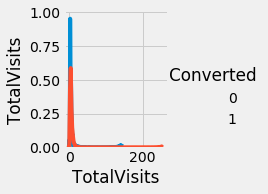

In [10]:
sb.pairplot(data=leads, hue='Converted', vars=['TotalVisits'])
plt.xscale()

In [11]:
# Dropping skewed variables

skewed = ['Do Not Call', 'Country', 'What matters most to you in choosing a course', 
          'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
          'Digital Advertisement', 'Through Recommendations',
          'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
          'Get updates on DM Content',
         'I agree to pay the amount through cheque']
leads.drop(labels=skewed, axis=1, inplace=True)

In [12]:
# Dropping Lead variables

drop = ['Tags', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 
        'Asymmetrique Profile Index','Asymmetrique Activity Score', 
        'Asymmetrique Profile Score', 'Last Notable Activity']
leads.drop(labels=drop, axis=1, inplace=True)

- **Combining categories with very less data points into one category**

In [13]:
# Combining categories with very less data points in 'Last Activity' variable into one

leads['Last Activity'].replace('Had a Phone Conversation', 'Others', inplace=True)
leads['Last Activity'].replace('Approached upfront', 'Others', inplace=True)
leads['Last Activity'].replace('View in browser link Clicked', 'Others', inplace=True)
leads['Last Activity'].replace('Email Received', 'Others', inplace=True)
leads['Last Activity'].replace('Email Marked Spam', 'Others', inplace=True)
leads['Last Activity'].replace('Visited Booth in Tradeshow', 'Others', inplace=True)
leads['Last Activity'].replace('Resubscribed to emails', 'Others', inplace=True)

In [14]:
# Combining categories with very less data points in 'What is your current occupation'-
# variable into one

leads['What is your current occupation'].replace('Housewife', 'Others', inplace=True)
leads['What is your current occupation'].replace('Businessman', 'Others', inplace=True)
leads['What is your current occupation'].replace('Other', 'Others', inplace=True)

In [15]:
# Combining categories with very less data points in 'Lead Source' variable into one

leads['Lead Source'].replace('Facebook', 'Others', inplace=True)
leads['Lead Source'].replace('bing', 'Others', inplace=True)
leads['Lead Source'].replace('Click2call', 'Others', inplace=True)
leads['Lead Source'].replace('Live Chat', 'Others', inplace=True)
leads['Lead Source'].replace('Social Media', 'Others', inplace=True)
leads['Lead Source'].replace('Press_Release', 'Others', inplace=True)
leads['Lead Source'].replace('youtubechannel', 'Others', inplace=True)
leads['Lead Source'].replace('NC_EDM', 'Others', inplace=True)
leads['Lead Source'].replace('Pay per Click Ads', 'Others', inplace=True)
leads['Lead Source'].replace('welearnblog_Home', 'Others', inplace=True)
leads['Lead Source'].replace('WeLearn', 'Others', inplace=True)
leads['Lead Source'].replace('blog', 'Others', inplace=True)
leads['Lead Source'].replace('testone', 'Others', inplace=True)

In [16]:
# Combining categories with very less data points in 'Lead Origin' variable into one

leads['Lead Origin'].replace('Lead Import', 'Others', inplace=True)
leads['Lead Origin'].replace('Quick Add Form', 'Others', inplace=True)

- **Converting `Select` into NaN**

In [17]:
# Converting data points which have 'Select' as their category into NaN values

leads.loc[leads['Specialization'] == 'Select','Specialization'] = np.nan
leads.loc[leads['How did you hear about X Education'] == 'Select',\
          'How did you hear about X Education'] = np.nan
leads.loc[leads['City'] == 'Select','City'] = np.nan

- **Percentage of `Missing` values in all columns**

In [18]:
# Checking for missing values

leads.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            3380
How did you hear about X Education        7250
What is your current occupation           2690
City                                      3669
A free copy of Mastering The Interview       0
dtype: int64

In [19]:
# Checking for missing percentage

round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                                0.00
Lead Number                                0.00
Lead Origin                                0.00
Lead Source                                0.39
Do Not Email                               0.00
Converted                                  0.00
TotalVisits                                1.48
Total Time Spent on Website                0.00
Page Views Per Visit                       1.48
Last Activity                              1.11
Specialization                            36.58
How did you hear about X Education        78.46
What is your current occupation           29.11
City                                      39.71
A free copy of Mastering The Interview     0.00
dtype: float64

In [20]:
# Checking how many columns have null percentage more than 0

len(list(list(np.where((round((leads.isnull().sum()/len(leads.index))*100,2))>0))[0]))

8

- **Dropping variables with null values above 40% and Imbalanced variables**

In [21]:
# Dropping 'How did you hear about X Education' and 'City' column as they have-
# high null values

leads.drop(labels=['How did you hear about X Education', 'City'],axis=1, inplace=True)

In [22]:
# Checking shape after dropping the columns

leads.shape

(9240, 13)

- **Imputing missing value by using `Mode` as they are categorical**

In [23]:
leads.loc[leads['Specialization'].isnull(),'Specialization'] = 'Finance Management'
leads.loc[leads['What is your current occupation'].isnull(),\
          'What is your current occupation'] = 'Unemployed'
leads.loc[leads['Last Activity'].isnull(),'Last Activity'] = 'Email Opened'
leads.loc[leads['Lead Source'].isnull(),'Lead Source'] = 'Google'

- **Imputing missing value by using `Median` as they are numerical and have outliers**

In [24]:
leads.loc[leads['TotalVisits'].isnull(),'TotalVisits'] = leads['TotalVisits'].median()

In [25]:
leads.loc[leads['Page Views Per Visit'].isnull(),\
          'Page Views Per Visit'] = leads['Page Views Per Visit'].median()

In [26]:
# Checking null values after imputation

round((leads.isnull().sum()/len(leads.index))*100,2)

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [27]:
# Checking how many columns have null percentage more than 0

len(list(list(np.where((round((leads.isnull().sum()/len(leads.index))*100,2))>0))[0]))

0

- **Checking for outliers**

In [28]:
# Checking for Central tendency, variance and outliers

leads.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


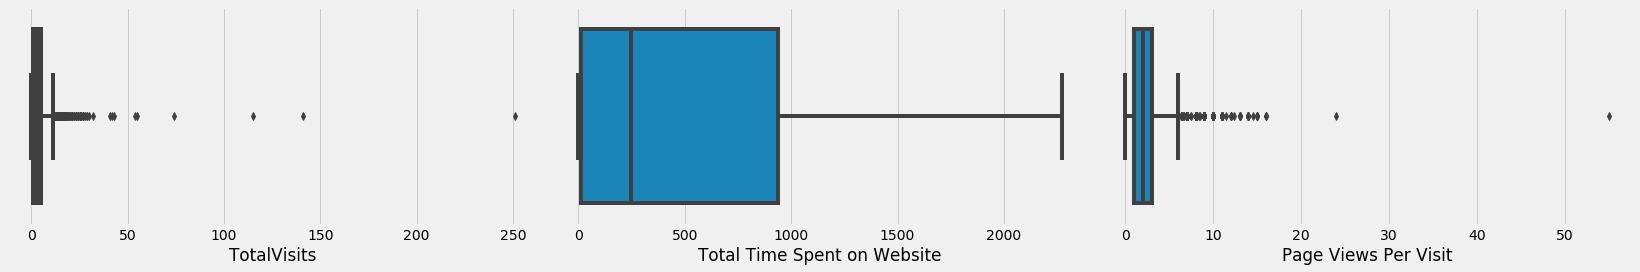

In [29]:
# Plotting boxplot for numerical variables

plt.figure(figsize=(23,4))
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for i in enumerate(features):
    plt.subplot(1,3,i[0]+1)
    sb.boxplot(leads[i[1]])

plt.tight_layout()
plt.show();

- Q1 = 25 percentile, Q2 = 50 percentile, Q3 = 75 percentile, IQR = Q3 - Q2
- Commonly used metric for outlier detection is IQR 1.5 rule
- The IOR 1.5 rule is that data point less than lower limit i.e (Q1 - IQR\*1.5) and more than upper limit i.e ( Q3 + IQR\*1.5) are considered to be an outlier

- **For analysis of boxplots figures, used describe function mentioned above**
<br>

- ***Observations:***
- **TotalVisits**
- It has a very right skewed plot with lot of outliers
- 75% of the visitors have visits less than equal to 5
- There is huge difference between 99% percentile and Max
- **Total Time Spent on Website**
- It is right skewed, however there are no outliers
- The spread of data above median is more than that of below median, this because mean is greater than median
- 25% of the visitors have visits less than equal to 12
- There is difference between 99% percentile and Max
- **Page Views Per Visit**
- It has a very right skewed distribution with lot of outliers
- 99% of the visitors have views less than equal to 9
- There is big difference between 99% percentile and Max

- **Outliers Treatment**

In [30]:
# Performed 99 percentile capping on the below mentioned variables as an outlier treatment

leads.loc[leads['TotalVisits']>float((leads['TotalVisits'].quantile([0.99]))),\
          'TotalVisits'] = float((leads['TotalVisits'].quantile([0.99])))
leads.loc[leads['Page Views Per Visit']>float((leads['Page Views Per Visit']\
                                               .quantile([0.99]))),\
          'Page Views Per Visit'] = float((leads['Page Views Per Visit'].quantile([0.99])))

In [31]:
leads.shape

(9240, 13)

In [32]:
# Checking for Central tendency, variance and outliers

leads.describe(percentiles=[0.25, 0.50, 0.75, 0.95, 0.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.327814,487.698268,2.329050
std,23405.995698,0.486714,3.228466,548.021466,1.971347
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000
max,660737.000000,1.000000,17.000000,2272.000000,9.000000


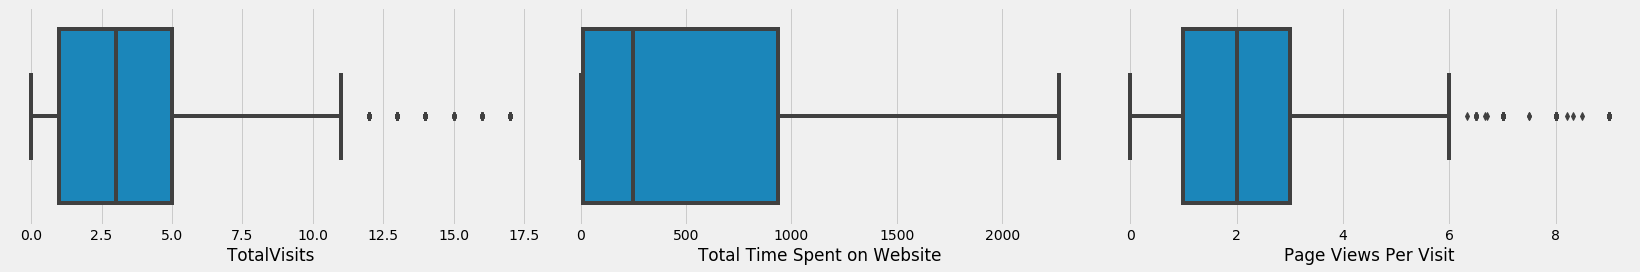

In [33]:
# Checking boxplot of numerical after capping outliers

plt.figure(figsize=(23,4))
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

for i in enumerate(features):
    plt.subplot(1,3,i[0]+1)
    sb.boxplot(leads[i[1]])

plt.tight_layout()
plt.show();

- **Analysis of boxplots after outlier capping**
- For analysis of boxplots figures, used describe function mentioned above
<br>

- ***Observations:***
- **TotalVisits**
- There is a bit of right skewness even after capping of outliers
- Still there are outliers
- 75% of the visitors have visits less than equal to 5, max being 17
- Within IQR range, datapoints are evenly spread above and below median
- **Total Time Spent on Website**
- It is right skewed, however there are no outliers
- The spread of data above median is more than that of below median, this because mean is greater than median
- 25% of the visitors have visits less than equal to 12
- There is difference between 99% percentile and Max
- **Page Views Per Visit**
- There is a bit of right skewness even after capping of outliers
- Still there are outliers
- 75% of the visitors have visits less than equal to 3, max being 9
- Within IQR range, datapoints are evenly spread above and below median

# 4. Exploratory Data Analysis

- **Checking imbalance percentage**

In [34]:
# We can see data imbalance in the 'TARGET' column

leads.Converted.value_counts(normalize=True)*100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

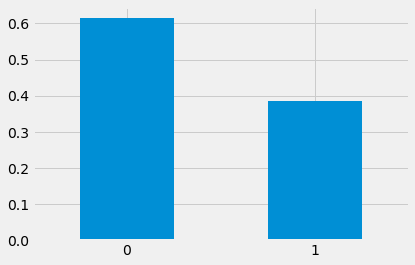

In [35]:
# Graphing data imbalance with a bar chart

leads.Converted.value_counts(normalize=True).plot(kind='bar',rot=False)
plt.show();

- ***Observations:***
- Above, Converted == '1' means converted and Converted == '0' means not converted
- Converted is on lower side, it is around 39% of the total counts

## Univariate Analysis w.r.t. 'Converted'

- **For Numerical variables**

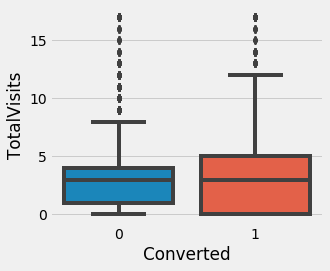

In [36]:
plt.figure(figsize=(5,4))

sb.boxplot(y='TotalVisits', x='Converted',data=leads)

plt.tight_layout()
plt.show();

- ***Observations:***
- Median for both Converted == 0 and Converted == 1 is similar
- Spread data points between Q1 and Q3 is more for Converted == 1 when comapred to Converted == 0
- Both Converted == 0 and Converted == 1 have outliers
- 50% of data points for both Converted == 0 and Converted == 1 is between 0 and 5
- Spread of IQR is more for Converted == 1 than Converted == 0

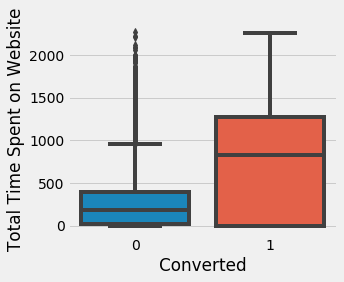

In [37]:
plt.figure(figsize=(5,4))

sb.boxplot(y='Total Time Spent on Website', x='Converted',data=leads)

plt.tight_layout()
plt.show();

- ***Observations:***
- There is big difference in median for Converted == 1 and Converted == 0, Converted == 1 has higher median value
- Converted == 0 has lot of outliers
- Converted == 0 is right skewed
- 50% of data points for Converted == 0 is between 0 and 500
- 50% of data points for Converted == 1 is between 0 and 1500
- Between Q1 and Q3, Converted == 1 has has more spread of data points below the median than above the median
- Converted == 1 has more number of visitors who spend more time in the website when compared to Converted == 0

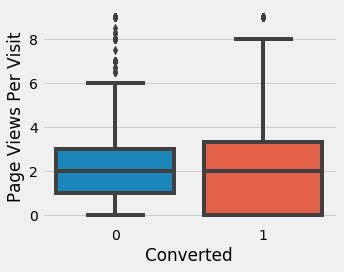

In [38]:
plt.figure(figsize=(5,4))

sb.boxplot(y='Page Views Per Visit', x='Converted',data=leads)

plt.tight_layout()
plt.show();

- ***Observations:***
- Median for both Converted == 1 and Converted == 0 is similar
- Spread data points between Q1 and Q3 is more for Converted == 1
- Both Converted == 1 and Converted == 0 has outliers
- 50% of data points for Converted == 0 is between 1 and 3
- 50% of data points for Converted == 1 is between 0 and 4
- For Converted == 1 spread of data below median is more
- For Converted == 0 there is equal spread of data above and below median
- Converted == 1 is more right skewed than Converted == 0, which means there are some visitors who have high page views per visit

- **For Categorical variables**

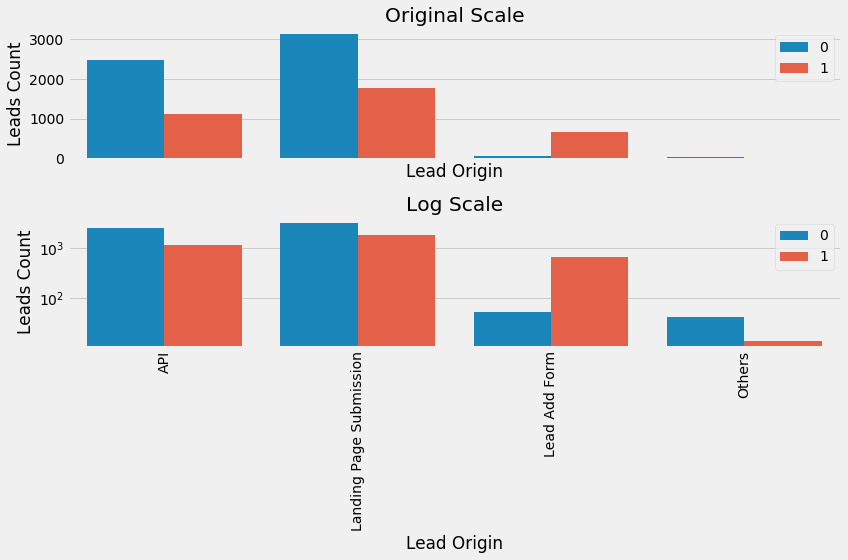

In [39]:
plt.figure(figsize=(12,8))

plt.subplot(211)
sb.countplot(x='Lead Origin',hue='Converted',data=leads)
plt.title('Original Scale')
plt.xticks([])
plt.ylabel('Leads Count')
plt.legend(loc='upper right')

plt.subplot(212)
sb.countplot(x='Lead Origin',hue='Converted',data=leads)
plt.yscale('log')
plt.title('Log Scale')
plt.xticks(rotation=90)
plt.ylabel('Leads Count')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show();

- ***Observations:***
- Used 'log' scale to get clearer plot
- **Converted == 0**
- 'Landing Page Submission' has highest number of Converted == 0 which is around 3000
- 'API' has second highest number of Converted == 0 which is around 2500
- 'Lead Add Form' has third highest number of Converted == 0, then comes 'Lead Import' and least being 'Quick Add Form'
- **Converted == 1**
- 'Landing Page Submission' has highest number of Converted == 1 which is around 1800
- 'API' has second highest number of Converted == 1 which is around 1100
- 'Lead Add Form' has third highest number of Converted == 1, then comes 'Lead Import' and least being 'Quick Add Form'
- **Ratio**
- 'Lead Add Form' has highest ratio of Converted to Not-Converted
- 'Landing Page Submission' has second highest ratio of Converted to Not-Converted, 'API' being third highest and 'Lead Import' being forth highest

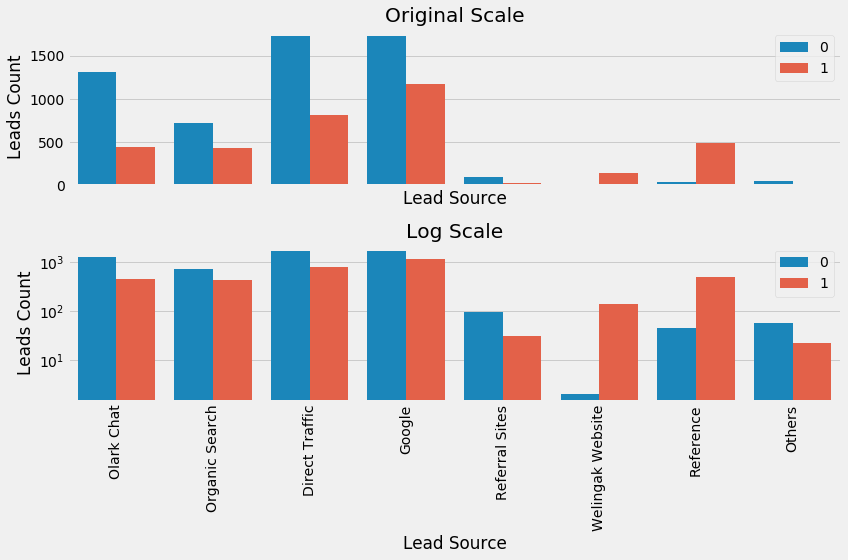

In [40]:
plt.figure(figsize=(12,8))

plt.subplot(211)
sb.countplot(x='Lead Source',hue='Converted',data=leads)
plt.title('Original Scale')
plt.xticks([])
plt.ylabel('Leads Count')
plt.legend(loc='upper right')

plt.subplot(212)
sb.countplot(x='Lead Source',hue='Converted',data=leads)
plt.yscale('log')
plt.title('Log Scale')
plt.xticks(rotation=90)
plt.ylabel('Leads Count')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show();

- ***Observations:***
- Used 'log' scale to get clearer plot
- **Converted == 0**
- Both 'Direct Traffic' and 'Google' have almost equal number of Converted == 0 which is around 1700, however 'Direct Traffic' has slightly more number of Converted == 0
- 'Olark Chat' has third highest number of Converted == 0 which is around 1300 and 'Organic Search' has fourth highest number of Converted == 0 of around 700
- **Converted == 1**
- 'Google' has number of Converted == 1 of around 1200 which is highest among all the categories and 'Direct Traffic' has second highest number of Converted == 1 of around 800
- 'Reference' has third highest number of Converted == 1 which is 500
- Both 'Olark Chat' and 'Organic Search' same number of Converted == 1 which is around 400 which is fourth highest
- **Ratio**
- 'Welingak Website' has highest ratio of Converted to Not-Converted
- 'Reference' has second highest ratio of Converted to Not-Converted
- 'Select' has third highest ratio of Converted to Not-Converted
- "Google" and 'Organic Search' being fourth and fifth respectively for ratio of Converted to Not-Converted

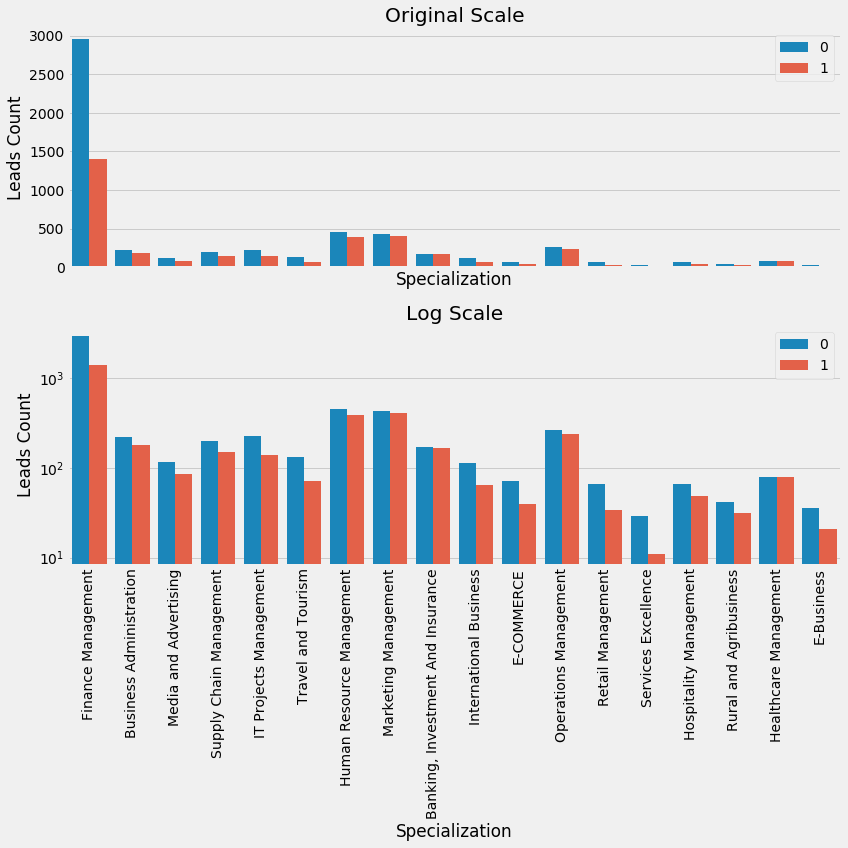

In [41]:
plt.figure(figsize=(12,12))

plt.subplot(211)
sb.countplot(x='Specialization',hue='Converted',data=leads)
plt.title('Original Scale')
plt.xticks([])
plt.ylabel('Leads Count')
plt.legend(loc='upper right')

plt.subplot(212)
sb.countplot(x='Specialization',hue='Converted',data=leads)
plt.yscale('log')
plt.title('Log Scale')
plt.xticks(rotation=90)
plt.ylabel('Leads Count')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show();

- ***Observations:***
- Used 'log' scale to get clearer plot
- **Converted == 0**
- For Specialization, 'Others' has highest number of Converted == 0 and it is around 2400
- For Specialization, 'Finance Management' has second highest number of Converted == 0 and it is more than 500 but less than 750
- For Specialization, 'Human Resource Management' has third highest number of Converted == 0 and it is around 500
- For Specialization, 'Marketing Management' has fourth highest number of Converted == 0 and it is more than 250 but less than 500, and fifth highest is 'Operations Management'
- **Converted == 1**
- For Specialization, 'Others' has highest number of Converted == 1 and it is around 1000
- For Specialization, 'Finance Management' has second highest number of Converted == 1 and it is more than 500 but less than 700
- For Specialization, 'Human Resource Management' and 'Marketing Management' have third highest number of Converted == 1 and it is around 400 and fourth highest is 'Operations Management'
- **Ratio**
- 'Banking, Investment And Insurance' and 'Healthcare Management' have same and highest ratio of Converted to Not-Converted
- 'Marketing Management' has second highest ratio of Converted to Not-Converted
- 'Operations Management' and 'Human Resource Management' have same and third highest ratio of Converted to Not-Converted
- 'Finance Management' being the fourth highest

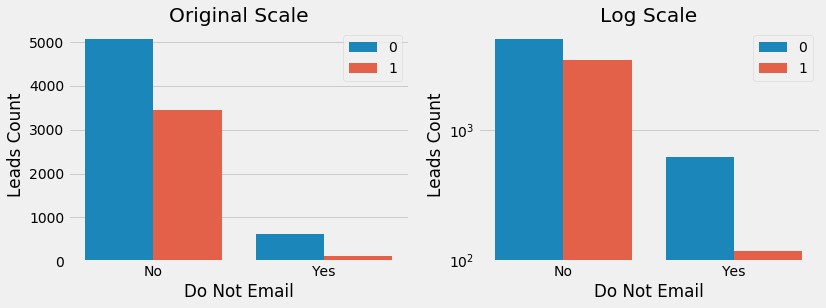

In [42]:
plt.figure(figsize=(12,4))

plt.subplot(121)
sb.countplot(x='Do Not Email',hue='Converted',data=leads)
plt.title('Original Scale')
plt.ylabel('Leads Count')
plt.legend(loc='upper right')

plt.subplot(122)
sb.countplot(x='Do Not Email',hue='Converted',data=leads)
plt.yscale('log')
plt.title('Log Scale')
plt.ylabel('Leads Count')
plt.legend(loc='upper right')

plt.show();

- ***Observations:***
- Used 'log' scale to get clearer plot
- **Converted == 0**
- Do Not Email 'No' has higher number of Converted == 0 when compared to 'Yes' and is more than 5000
- **Converted == 1**
- Do Not Email 'No' has higher number of Converted == 1 when compared to 'Yes' and is around 3500
- **Ratio**
- Do Not Email 'No' has highest ratio of Converted to Not-Converted when compared to 'Yes'

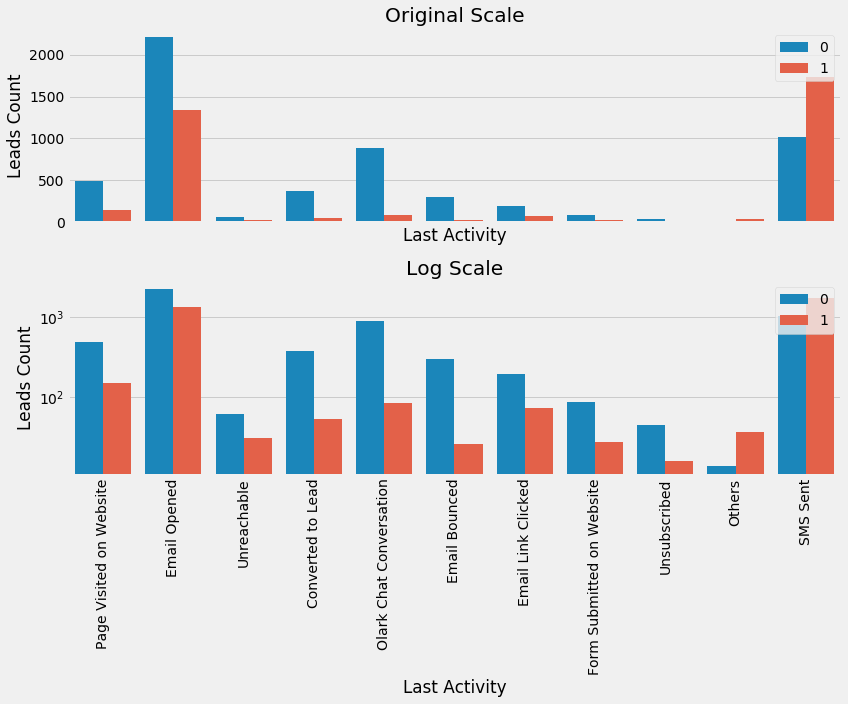

In [43]:
plt.figure(figsize=(12,10))

plt.subplot(211)
sb.countplot(x='Last Activity',hue='Converted',data=leads)
plt.title('Original Scale')
plt.xticks([])
plt.ylabel('Leads Count')
plt.legend(loc='upper right')

plt.subplot(212)
sb.countplot(x='Last Activity',hue='Converted',data=leads)
plt.yscale('log')
plt.title('Log Scale')
plt.xticks(rotation=90)
plt.ylabel('Leads Count')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show();

- ***Observations:***
- Used 'log' scale to get clearer plot
- **Converted == 0**
- For Last activity, 'Email Opened' has highest number of Converted == 0 of more than 2000
- For Last activity, 'SMS Sent' has second highest number of Converted == 0 of 1000
- For Last activity, 'Olark Chat Conversation' has third highest number of Converted == 0 of around 900
- **Converted == 1**
- For Last activity, 'SMS Sent' has highest number of Converted == 1 of around 1700
- For Last activity, 'Email Opened' has second highest number of Converted == 1 of around 1250
- For Last activity, 'Page Visited on Website' has third highest number of Converted == 1 of around 200
- **Ratio**
- 'Approached Upfront' has highest ratio of Converted to Not-Converted
- 'Select' has second highest ratio of Converted to Not-Converted
- 'SMS Sent' has third highest ratio of Converted to Not-Converted
- 'Had a Phine Conversation' has fourth highest ratio of Converted to Not-Converted

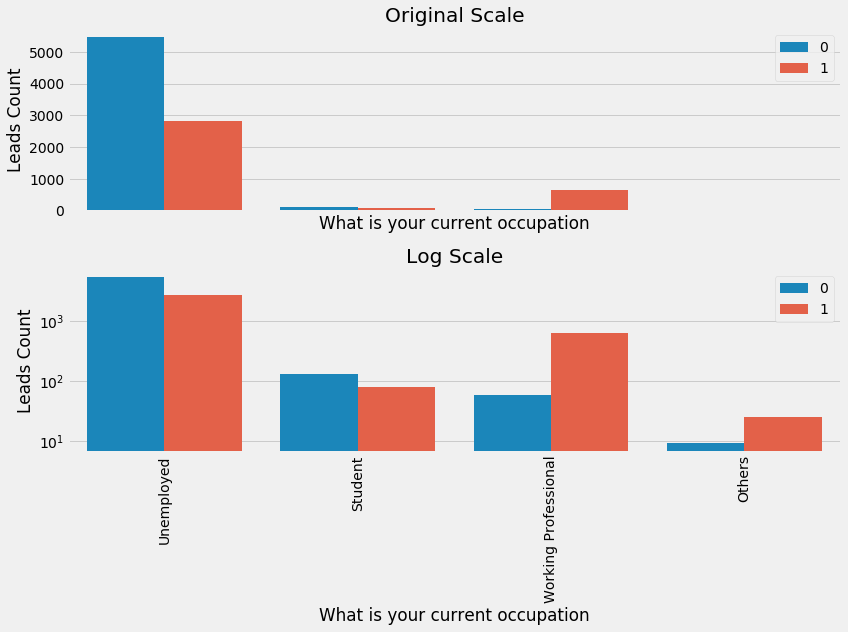

In [44]:
plt.figure(figsize=(12,9))

plt.subplot(211)
sb.countplot(x='What is your current occupation',hue='Converted',data=leads)
plt.xticks([])
plt.title('Original Scale')
plt.ylabel('Leads Count')
plt.legend(loc='upper right')

plt.subplot(212)
sb.countplot(x='What is your current occupation',hue='Converted',data=leads)
plt.yscale('log')
plt.title('Log Scale')
plt.xticks(rotation=90)
plt.ylabel('Leads Count')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show();

- ***Observations:***
- Used 'log' scale to get clearer plot
- **Converted == 0**
- 'Unemployed' has highest number of Converted == 0 of more than 5300
- 'Student' has second highest number of Converted == 0 of around 200
- 'Working Professional' has third highest number of Converted == 0 of around 80
- **Converted == 1**
- 'Unemployed' has highest number of Converted == 1 of around 2900
- 'Working Professional' has second highest number of Converted == 1 of around 800
- 'Student' has third highest number of Converted == 1 of around 90
- **Ratio**
- 'Housewife' has highest ratio of Converted to Not-Converted
- 'Working Professional' has second highest ratio of Converted to Not-Converted
- 'Other' has third highest ratio of Converted to Not-Converted

## Bivariate Analysis w.r.t. 'Converted'

- **For Numerical variables**

In [45]:
features = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

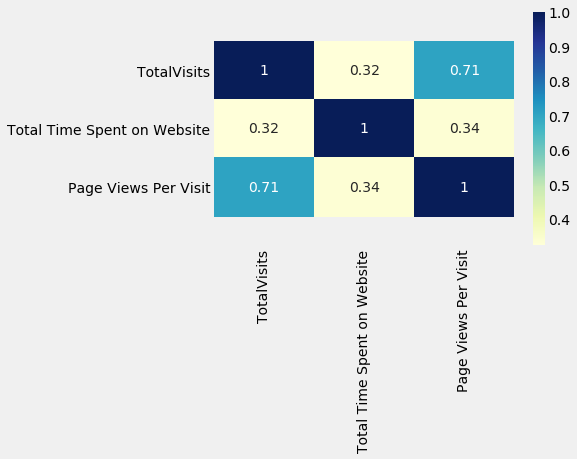

In [46]:
ax = sb.heatmap(leads[features].corr(), annot=True, cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show();

- ***Observations:***
- 'TotalVisits' and 'Page Views Per Visit' has Positive correlation of 0.71 which is highest among all the correlation that variables have with each other
- 'Total Time Spent on Website' and 'Page Views Per Visit' has Positive correlation of 0.34 which is second highest
- 'Total Time Spent on Website' and 'TotalVisits' has Positive correlation of 0.32 which is third highest
- Rest of the variables have very less correlation with each other

- **For Categorical variables**

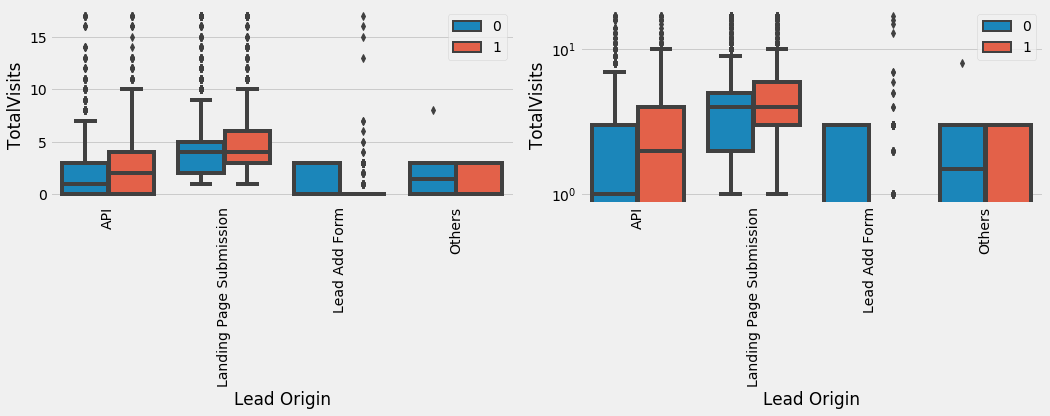

In [47]:
# Plotting boxplot for 'Lead Origin' vs. 'TotalVisits'

plt.figure(figsize=(15,6))

plt.subplot(121)
sb.boxplot(x='Lead Origin', y='TotalVisits',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(122)
sb.boxplot(x='Lead Origin', y='TotalVisits',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.yscale('log')

plt.tight_layout()
plt.show();

In [48]:
pd.pivot_table(leads, values='TotalVisits', columns='Lead Origin',\
               index='Converted')

Lead Origin,API,Landing Page Submission,Lead Add Form,Others
Converted,,,,
0,1.894929,4.322322,0.888889,1.619048
1,2.828700,5.015837,0.674699,1.071429


- ***Observations:***
- Used 'log' scale to get clearer plot
- Even Log scale is not giving clearer picture for Lead Source due to outliers. However, we can see the following,
- Upper whisker for all categories is either on or below 10 visits
- **Landing Page Submission**
- It has highest median among all the categories
- For Converted == 0, spread of data points is more below the median, this shows that Converted == 0 has low number of visits in comparison to Converted == 1
- For Converted == 1, spread of data points is more above the median, this shows that Converted == 1 has high number of visits in comparison to Converted == 0
- There are lot of outliers
- **API**
- Median for Converted == 1 is greater than Converted == 0
- There are lot outliers which are responsible for skewed plot
- It seems total visits range is more for Converted == 1 compared to Converted == 0
- Mean total visits is more for Converted == 1
- **Lead Add Form**
- Plot is very skewed
- Converted == 1 has lot of outliers which are skewing the data
- Cannot make much inferences
- Mean total visits is more for Converted == 0
- **Others**
- Plot is very skewed
- Median for Converted == 0 is greater than Converted == 1
- Cannot make much inferences
- Mean total visits is more for Converted == 0

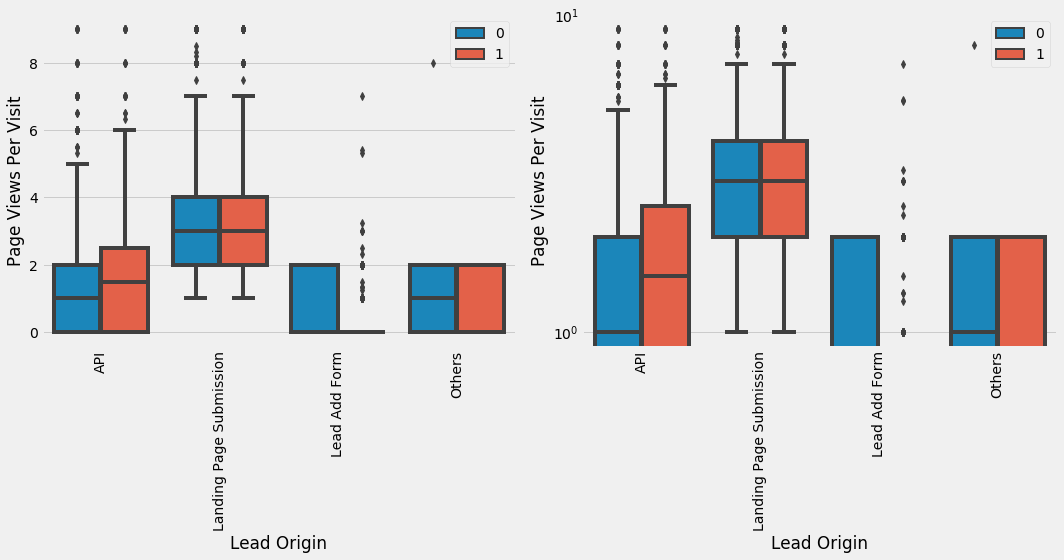

In [49]:
# Plotting boxplot for 'Lead Origin' vs. 'Page Views Per Visit'

plt.figure(figsize=(15,8))

plt.subplot(121)
sb.boxplot(x='Lead Origin', y='Page Views Per Visit',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(122)
sb.boxplot(x='Lead Origin', y='Page Views Per Visit',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.yscale('log')

plt.tight_layout()
plt.show();

In [50]:
pd.pivot_table(leads, values='Page Views Per Visit', columns='Lead Origin',\
               index='Converted')

Lead Origin,API,Landing Page Submission,Lead Add Form,Others
Converted,,,,
0,1.282596,3.215645,0.583333,1.142857
1,1.687220,3.441442,0.417500,0.714286


- ***Observations:***
- Used 'log' scale to get clearer plot
- Even Log scale is not giving clearer picture for Lead Source due to outliers. However, we can see the following,
- Upper whisker for all categories is below 10 views per visit
- **Landing Page Submission**
- It has highest median value among all the categories
- Its has more data points with large page views per visit
- The spread of data points for both Converted == 0 and Converted == 1 is almost similar
- There are lot of outliers
- Mean page views per visit is more for Converted == 1
- **API**
- Median value for Converted == 1 is greater than Converted == 0
- There are lot outliers which are responsible for skewed plot
- It seems page views per visit range is more for Converted == 1 compared to Converted == 0
- Mean page views per visit is more for Converted == 1
- **Lead Add Form**
- Plot is very skewed
- Converted == 1 has lot of outliers which are skewing the data
- Cannot make much inferences
- Mean page views per visit is more for Converted == 0
- **Others**
- Plot is very skewed
- Median value for Converted == 0 is greater than Converted == 1
- Cannot make much inferences
- Mean page views per visit is more for Converted == 0

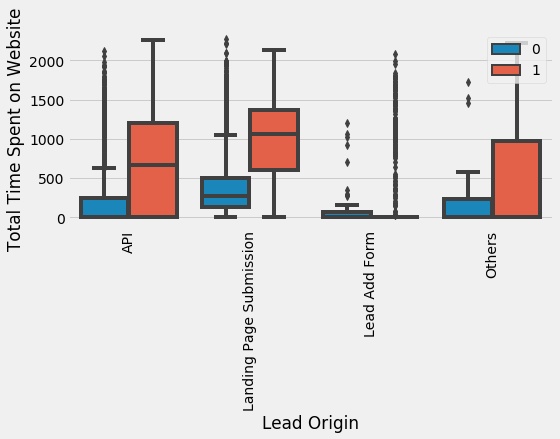

In [51]:
# Plotting boxplot for 'Lead Origin' vs. 'Total Time Spent on Website'

plt.figure(figsize=(8,6))

sb.boxplot(x='Lead Origin', y='Total Time Spent on Website',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

In [52]:
pd.pivot_table(leads, values='Total Time Spent on Website', columns='Lead Origin',\
               index='Converted')

Lead Origin,API,Landing Page Submission,Lead Add Form,Others
Converted,,,,
0,212.305477,429.143682,125.000000,195.571429
1,651.320179,985.544683,232.043675,515.928571


- ***Observations:***
- Even Log scale is not giving clearer picture for Lead Source due to outliers. However, we can see the following,
- Spread of data points for Converted == 1 is more for 'API', 'Landing Page Submission' and 'Others'
- **Landing Page Submission**
- Median balue for Converted == 1 is more than Converted == 0
- Spread of data points within IQR is more for Converted == 1 as compared to Converted == 0
- Time spent on website is more for Converted == 1
- It seems higher the time spent, higher is possibility of Converted == 1
- Spread of data points within IQR for Converted == 1 is between 600 to 1400
- Spread of data points within IQR for Converted == 0 is between 100 to 500
- Mean time spent on website for Converted == 1 is more than double that of Converted == 0
- **API**
- Median balue for Converted == 1 is more than Converted == 0
- Spread of data points within IQR is more for Converted == 1 as compared to Converted == 0
- Time spent on website is more for Converted == 1
- It seems higher the time spent, higher is possibility of Converted == 1
- Spread of data points within IQR for Converted == 1 is between 0 to 1200
- Spread of data points within IQR for Converted == 0 is between 0 to 250
- Mean time spent on website for Converted == 1 is more than 3 times that of Converted == 0
- **Lead Add Form**
- Plot is very skewed
- Converted == 1 has lot of outliers which are skewing the data
- Cannot make much inferences
- Mean time spent on website is more for Converted == 1
- It seems higher the time spent, higher is possibility of Converted == 1
- **Others**
- Spread of data points within IQR is more for Converted == 1 as compared to Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1
- It seems spread of data points within IQR for Converted == 1 is between 0 to 1000
- It seems spread of data points within IQR for Converted == 0 is between 0 to 250
- Mean time spent on website for Converted == 1 is more than double that of Converted == 0

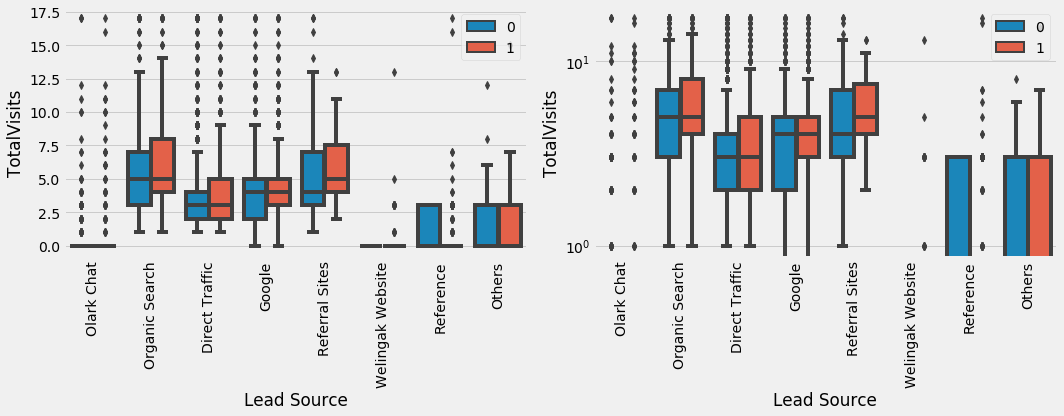

In [53]:
# Plotting boxplot for 'Lead Source' vs. 'TotalVisits'
plt.figure(figsize=(15,6))

plt.subplot(121)
sb.boxplot(x='Lead Source', y='TotalVisits',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(122)
sb.boxplot(x='Lead Source', y='TotalVisits',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.yscale('log')

plt.tight_layout()
plt.show();

In [54]:
pd.pivot_table(leads, values='TotalVisits', columns='Lead Source', index='Converted')

Lead Source,Direct Traffic,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website
Converted,,,,,,,,
0,3.733913,3.979227,0.247131,5.455432,2.160714,0.818182,5.638298,0.000000
1,4.410758,4.383503,0.656250,6.369266,1.954545,0.726531,5.967742,0.478571


- ***Observations:***
- Used 'log' scale to get clearer plot
- Even Log scale is not giving clearer picture for Lead Source due to outliers.
- **Olark Chat**
- Plot is very skewed
- There are lot of outliers in both Converted == 0 and Converted == 1
- Cannot make much inferences, however, mean total visits are a bit more for Converted == 1
- **Organic Search**
- Median value is same for both Converted == 0 and Converted == 1
- Spread of data points above median is more for Converted == 1 and spread of data below the median is more for Converted == 0
- Range of Total visits is more for Converted == 1 as compared to Converted == 0
- There are lot of outliers in both Converted == 0 and Converted == 1
- Mean Total visits are a bit more for Converted == 1
- **Direct Traffic**
- Median value is same for both Converted == 0 and Converted == 1
- Spread of data points above median is more for Converted == 1 and spread of data below the median is more for Converted == 0
- Range of Total visits is more for Converted == 1 as compared to Converted == 0
- There are lot of outliers in both Converted == 0 and Converted == 1
- Mean Total visits are a bit more for Converted == 1
- **Google**
- Median value is same for both Converted == 0 and Converted == 1
- Spread of data below the median is more for Converted == 0
- Spread of data is more or less similar above and below the median for Converted == 1
- Range of Total visits is more for Converted == 0 as compared to Converted == 1
- There are lot of outliers in both Converted == 0 and Converted == 1
- Mean Total visits are a bit more for Converted == 1
- **Referral Sites**
- Median value is more for Converted == 1
- Spread of data below the median is more for Converted == 0
- Spread of data is more or less similar above and below the median for Converted == 1
- Range of Total visits is more for Converted == 0 as compared to Converted == 1
- There are outliers in both Converted == 0 and Converted == 1
- Mean Total visits are a bit more for Converted == 0
- **Welingak Website**
- Plot is very skewed
- There are lot of outliers in both Converted == 0 and Converted == 1
- Cannot make much inferences, however, mean total visits are a bit more for Converted == 1
- **Reference**
- Plot is very skewed
- Converted == 1 has lot of outliers which are skewing the data
- Cannot make much inferences, however, mean total visits are a bit more for Converted == 0
- **Others**
- It seems spread of data points within IQR is more or less similar for both Converted == 0 and Converted == 1
- There are outliers in both Converted == 0 and Converted == 1
- Range of Total visits is more for Converted == 1 as compared to Converted == 0, however mean total visits is more for Converted == 0

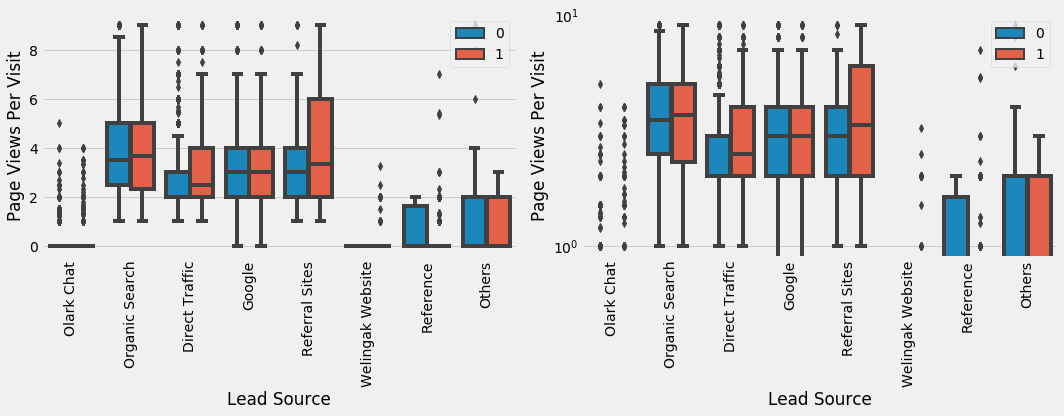

In [55]:
# Plotting boxplot for 'Lead Source' vs. 'Page Views Per Visit'

plt.figure(figsize=(15,6))

plt.subplot(121)
sb.boxplot(x='Lead Source', y='Page Views Per Visit',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(122)
sb.boxplot(x='Lead Source', y='Page Views Per Visit',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.yscale('log')

plt.tight_layout()
plt.show();

In [56]:
pd.pivot_table(leads, values='Page Views Per Visit', columns='Lead Source',\
               index='Converted')

Lead Source,Direct Traffic,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website
Converted,,,,,,,,
0,2.702870,2.971812,0.110107,3.983649,1.651786,0.534091,3.560745,0.0000
1,2.993545,2.987262,0.259576,4.021651,0.988636,0.461163,4.306452,0.2875


- ***Observations:***
- Used 'log' scale to get clearer plot
- Even Log scale is not giving clearer picture for Lead Source due to outliers.
- **Olark Chat**
- Plot is very skewed
- There are lot of outliers in both Converted == 0 and Converted == 1
- Cannot make much inferences, however, mean Page Views Per Visit are a bit more for Converted == 1
- **Organic Search**
- Median value for Converted == 1 is a bit more than Converted == 0
- Spread of data points below median is more for Converted == 1 and spread of data above and below the median is more or less similar for Converted == 0
- Range of page views per visit is a bit more for Converted == 1 as compared to Converted == 0
- There are outliers in both Converted == 0 and Converted == 1
- Mean page views per visit are a bit more for Converted == 1
- **Direct Traffic**
- It seems median value for Converted == 1 is more than Converted == 0
- Spread of data points above median is more for Converted == 1, cannot say much about Converted == 0 as there is skewness
- Range of page views per visit is more for Converted == 1 as compared to Converted == 0
- There are lot of outliers in both Converted == 0 and Converted == 1
- Mean page views per visit are a bit more for Converted == 1
- **Google**
- Median value is same for both Converted == 0 and Converted == 1
- Spread of data below the median is more for both Converted == 0 and Converted == 1
- Range of page views per visit is more or less similar for Converted == 0 and Converted == 1
- There are outliers in both Converted == 0 and Converted == 1
- Mean page views per visit is more or less similar for Converted == 0 and Converted == 1
- **Referral Sites**
- Median value is more for Converted == 1 when compared to Converted == 0
- Spread of data below the median is more for Converted == 0
- Spread of data above the median is more for Converted == 1
- Range of page views per visit is more for Converted == 1 as compared to Converted == 0
- There are outliers in both Converted == 0 and Converted == 1
- Mean page views per visit is more for Converted == 1 when compared to Converted == 0
- **Welingak Website**
- Plot is very skewed
- There are lot of outliers in both Converted == 0 and Converted == 1
- Cannot make much inferences, however, mean page views per visit are a bit more for Converted == 1
- **Reference**
- Plot is very skewed
- Converted == 1 has lot of outliers which are skewing the data
- Cannot make much inferences, however, mean page views per visit are a bit more for Converted == 0
- **Others**
- It seems spread of data points within IQR is more or less similar for both Converted == 0 and Converted == 1
- There are outliers in both Converted == 0
- it seems range of page views per visit is more for Converted == 0 as compared to Converted == 1, however mean page views per visit is more for Converted == 0

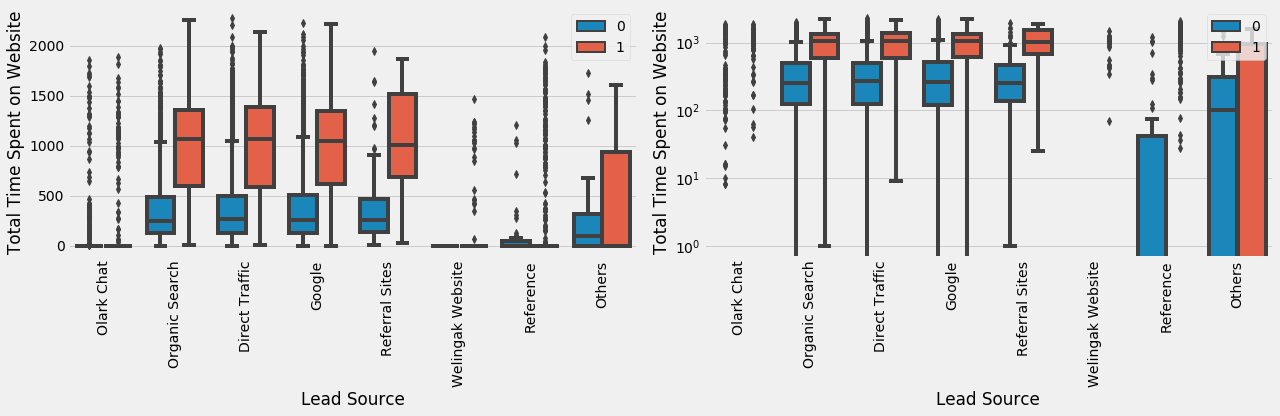

In [57]:
# Plotting boxplot for 'Lead Source' vs. 'Total Time Spent on Website'

plt.figure(figsize=(18,6))

plt.subplot(121)
sb.boxplot(x='Lead Source', y='Total Time Spent on Website',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.subplot(122)
sb.boxplot(x='Lead Source', y='Total Time Spent on Website',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.yscale('log')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

In [58]:
pd.pivot_table(leads, values='Total Time Spent on Website', columns='Lead Source',\
               index='Converted')

Lead Source,Direct Traffic,Google,Olark Chat,Organic Search,Others,Reference,Referral Sites,Welingak Website
Converted,,,,,,,,
0,424.038261,429.879400,37.369549,412.013928,241.642857,121.250000,387.074468,0.000000
1,989.432763,972.528912,131.151786,981.383028,477.181818,261.720408,1006.548387,145.228571


- ***Observations:***
- Used 'log' scale to get clearer plot
- Even Log scale is not giving clearer picture for Lead Source due to outliers
- **Olark Chat**
- Plot is very skewed
- There are lot of outliers in both Converted == 0 and Converted == 1
- Cannot make much inferences, however, mean Total Time Spent on Website for Converted == 1 is more than 3 times of Converted == 0
- **Organic Search**
- Median value for Converted == 1 is more than Converted == 0
- Spread of data points below median is more for Converted == 1 and spread of data above and below the median is same for Converted == 0
- Range of Total Time Spent on Website is a bit more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0
- Spread of data points within IQR for Converted == 1 is between 600 to 1400
- Spread of data points within IQR for Converted == 0 is between 100 to 500
- Mean Total Time Spent on Website for Converted == 1 is more than double that of Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1
- **Direct Traffic**
- Median value for Converted == 1 is more than Converted == 0
- Spread of data points below median is more for Converted == 1 and spread of data below the median is a bit more for Converted == 0
- Range of Total Time Spent on Website is a bit more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0
- Spread of data points within IQR for Converted == 1 is between 600 to 1500
- Spread of data points within IQR for Converted == 0 is between 100 to 500
- Mean Total Time Spent on Website for Converted == 1 is more than double that of Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1
- **Google**
- Median value for Converted == 1 is more than Converted == 0
- Spread of data points below median is more for Converted == 1 and spread of data above and below the median is same for Converted == 0
- Range of Total Time Spent on Website is a bit more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0
- Spread of data points within IQR for Converted == 1 is between 600 to 1400
- Spread of data points within IQR for Converted == 0 is between 100 to 500
- Mean Total Time Spent on Website for Converted == 1 is more than double that of Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1
- **Referral Sites**
- Median value for Converted == 1 is more than Converted == 0
- Spread of data points above and below median is same for Converted == 1 and Converted == 0
- Range of Total Time Spent on Website is a bit more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0
- Spread of data points within IQR for Converted == 1 is between 600 to 1600
- Spread of data points within IQR for Converted == 0 is between 100 to 500
- Mean Total Time Spent on Website for Converted == 1 is more than double that of Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1
- **Reference**
- Plot is very skewed
- There are lot of outliers in both Converted == 0 and Converted == 1
- Cannot make much inferences, however, mean Total Time Spent on Website for Converted == 1 is more than double that of Converted == 0
- **Others**
- There are outliers in Converted == 0
- It seems range of Total Time Spent on Website is a bit more for Converted == 1 as compared to Converted == 0
- Spread of data points within IQR is more for Converted == 1 as compared to Converted == 0
- It seems spread of data points within IQR for Converted == 1 is between 0 to 1000
- It seems spread of data points within IQR for Converted == 0 is between 0 to 300
- Mean time spent on website for Converted == 1 is more than double that of Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1

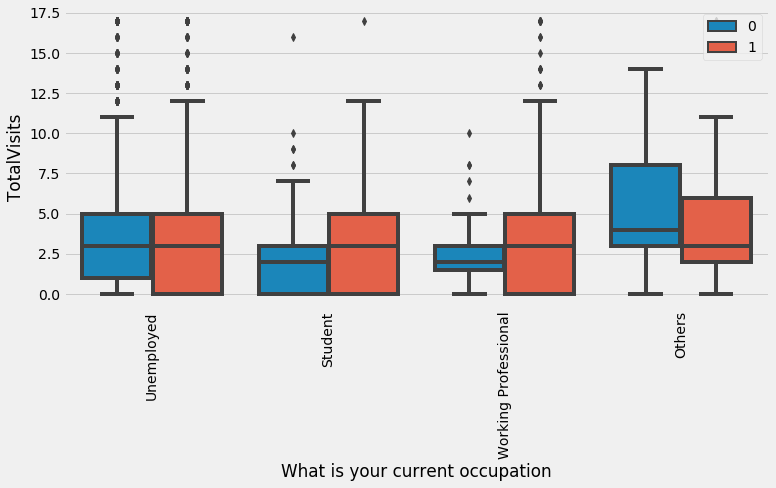

In [59]:
# Plotting boxplot for 'What is your current occupation' vs. 'TotalVisits'

plt.figure(figsize=(11,7))

sb.boxplot(x='What is your current occupation', y='TotalVisits',hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

In [60]:
pd.pivot_table(leads, values='TotalVisits', columns='What is your current occupation',\
               index='Converted')

What is your current occupation,Others,Student,Unemployed,Working Professional
Converted,,,,
0,5.555556,2.128788,3.245848,2.525424
1,4.680000,3.615385,3.520100,3.386399


- ***Observations:***
- **Unemployed**
- Median value for both Converted == 1 and Converted == 0 is same
- Spread of data points above and below median is same for Converted == 0 
- Spread of data points below the median is more for Converted == 1
- Range of Total visits is a bit more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 and Converted == 1
- IQR spread for Converted == 1 is between 0 and 5
- IQR spread for Converted == 0 is between 1 to 5
- Mean total visits for Converted == 1 is more than Converted == 0
- **Student**
- Median value for Converted == 1 is more than median value of Converted == 0
- For both Converted == 0 and Converted == 1, spread of data points below the median is more
- Range of Total visits is more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 and Converted == 1
- IQR spread for Converted == 1 is between 0 and 5
- IQR spread for Converted == 0 is between 0 to 3
- Mean total visits for Converted == 1 is more than Converted == 0
- **Working Professional**
- Median value for Converted == 1 is more than median value of Converted == 0
- Spread of data points above the median is more for Converted == 0 
- Spread of data points below the median is more for Converted == 1
- Range of Total visits is more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 and Converted == 1
- IQR spread for Converted == 1 is between 0 and 5
- IQR spread for Converted == 0 is between 1.25 to 3.75
- Mean total visits for Converted == 1 is more than Converted == 0
- **Others**
- Median value for Converted == 0 is more than median value of Converted == 1
- For both Converted == 0 and Converted == 1, spread of data points above the median is more
- Range of Total visits is more for Converted == 0 as compared to Converted == 1
- There are no outliers in Converted == 0 and Converted == 1
- IQR spread for Converted == 1 is between 2.25 and 6.25
- IQR spread for Converted == 0 is between 2.5 to 8.75
- Mean total visits for Converted == 0 is more than Converted == 1

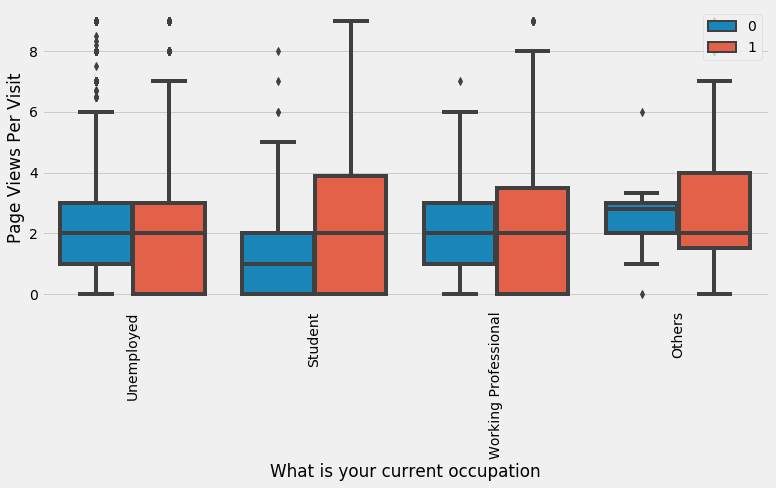

In [61]:
# Plotting boxplot for 'What is your current occupation' vs. 'Page Views Per Visit'

plt.figure(figsize=(11,7))

sb.boxplot(x='What is your current occupation', y='Page Views Per Visit',\
           hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

In [62]:
pd.pivot_table(leads, values='Page Views Per Visit', \
               columns='What is your current occupation', index='Converted')

What is your current occupation,Others,Student,Unemployed,Working Professional
Converted,,,,
0,2.644444,1.555530,2.358492,1.968983
1,2.993200,2.467821,2.311320,2.300618


- ***Observations:***
- **Unemployed**
- Median value for both Converted == 1 and Converted == 0 is same
- Spread of data points above and below median is same for Converted == 0 
- Spread of data points below the median is more for Converted == 1
- Range of Page Views Per Visit is a bit more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 and Converted == 1
- IQR spread for Converted == 1 is between 0 and 3
- IQR spread for Converted == 0 is between 1 to 3
- Mean Page Views Per Visit for Converted == 0 is more than Converted == 1
- **Student**
- Median value for Converted == 1 is more than median value of Converted == 0
- For both Converted == 0 and Converted == 1, spread of data points below the median is more
- Range of Page Views Per Visit is more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 but no outliers in Converted == 1
- IQR spread for Converted == 1 is between 0 and 4
- IQR spread for Converted == 0 is between 0 to 2.5
- Mean Page Views Per Visit for Converted == 1 is more than Converted == 0
- **Working Professional**
- Median value for both Converted == 1 and Converted == 0 is same
- Spread of data points above and below median is same for Converted == 0 
- Spread of data points below the median is more for Converted == 1
- Range of Page Views Per Visit is more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 and Converted == 1
- IQR spread for Converted == 1 is between 0 and 4
- IQR spread for Converted == 0 is between 1 to 3
- Mean Page Views Per Visit for Converted == 1 is more than Converted == 0
- **Others**
- Median value for Converted == 0 is more than median value of Converted == 1
- Spread of data points below median is more for Converted == 0 
- Spread of data points above the median is more for Converted == 1
- Range of Page Views Per Visit is more for Converted == 1 as compared to Converted == 0
- There are outliers for Converted == 0
- IQR spread for Converted == 1 is between 1 and 4
- IQR spread for Converted == 0 is between 2 to 3
- Mean Page Views Per Visit for Converted == 1 is more than Converted == 0

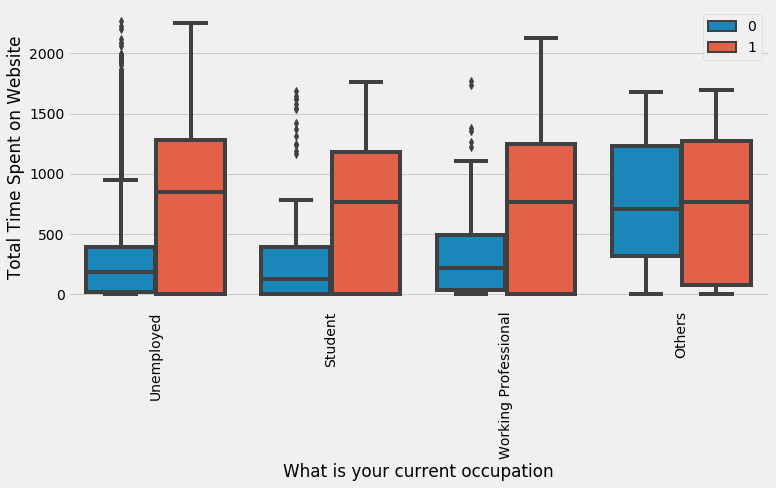

In [63]:
# Plotting boxplot for 'What is your current occupation' vs. 'Total Time Spent on Website'

plt.figure(figsize=(11,7))

sb.boxplot(x='What is your current occupation', y='Total Time Spent on Website',\
           hue='Converted',data=leads)
plt.legend(loc='upper right')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

In [64]:
pd.pivot_table(leads, values='Total Time Spent on Website',\
               columns='What is your current occupation', index='Converted')

What is your current occupation,Others,Student,Unemployed,Working Professional
Converted,,,,
0,761.444444,301.643939,329.936302,372.474576
1,747.720000,681.448718,747.880114,704.525502


- ***Observations:***
- **Unemployed**
- Median value for Converted == 1 is far more than Converted == 0
- Spread of data points above median is a bit more for Converted == 0 
- Spread of data points below the median is more for Converted == 1
- Range of Total Time Spent on Website is more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 but not in Converted == 1
- IQR spread for Converted == 1 is between 0 and 1300
- IQR spread for Converted == 0 is between 0 to 400
- Mean Total Time Spent on Website for Converted == 1 is more than Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1
- **Student**
- Median value for Converted == 1 is far more than Converted == 0
- Spread of data points above median is more for Converted == 0 
- Spread of data points below the median is more for Converted == 1
- Range of Total Time Spent on Website is more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 but not in Converted == 1
- IQR spread for Converted == 1 is between 0 and 1250
- IQR spread for Converted == 0 is between 0 to 400
- Mean Total Time Spent on Website for Converted == 1 is more than Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1
- **Working Professional**
- Median value for Converted == 1 is far more than Converted == 0
- Spread of data points above median is more for Converted == 0 
- Spread of data points below the median is more for Converted == 1
- Range of Total Time Spent on Website is more for Converted == 1 as compared to Converted == 0
- There are outliers in Converted == 0 but not in Converted == 1
- IQR spread for Converted == 1 is between 0 and 1300
- IQR spread for Converted == 0 is between 0 to 500
- Mean Total Time Spent on Website for Converted == 1 is more than Converted == 0
- It seems higher the time spent, higher is possibility of Converted == 1
- **Others**
- Median value for Converted == 1 is a bit more than Converted == 0
- Spread of data points above median is more for Converted == 0 
- Spread of data points below the median is more for Converted == 1
- Range of Total Time Spent on Website is a bit more for Converted == 1 as compared to Converted == 0
- There are no outliers in both Converted == 0 and Converted == 1
- IQR spread for Converted == 1 is between 0 and 1300
- IQR spread for Converted == 0 is between 250 to 1250
- Mean Total Time Spent on Website for Converted == 0 is more than Converted == 1

# 5. Data Pre-processing

- **Dummy variable encoding**

In [65]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,No
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,No
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,No


In [66]:
# Creating a new dataframe

leads_modified = leads.copy()

- **Dummy encoding**

In [67]:
# Performing pd.get_dummies

dummy = pd.get_dummies(leads_modified[['Last Activity', 'Specialization', 
                                       'What is your current occupation', 'Do Not Email',
                                       'A free copy of Mastering The Interview',
                                       'Lead Origin', 'Lead Source']])
dummy.head()

,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_No,Do Not Email_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [68]:
# Selecting columns that need to be dropped

drop_columns = ['Lead Number', 'Last Activity', 'Specialization', 
                'A free copy of Mastering The Interview', 
                'What is your current occupation', 'Do Not Email',
                'Lead Origin', 'Lead Source']

In [69]:
# Concatinatng leads_modofied and dummy
leads_modified = pd.concat([leads_modified,dummy],axis=1)
leads_modified.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_No,Do Not Email_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Finance Management,Unemployed,No,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Finance Management,Unemployed,No,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Finance Management,Unemployed,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [70]:
# Checking the shape of resultant dataframe

leads_modified.shape

(9240, 62)

In [71]:
# Dropping unnecessary variables

leads_modified.drop(labels=drop_columns, axis=1, inplace=True)

In [72]:
leads_modified.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_No,Do Not Email_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0


In [73]:
# Checking the shape of resultant dataframe

leads_modified.shape

(9240, 54)

# 6. Model Building

## Performing Train, Test split

In [74]:
# Bifurcating features and target variable
X = leads_modified.drop('Converted', axis=1)
y = leads_modified['Converted']

In [75]:
# Checking shape

X.shape, y.shape

((9240, 53), (9240,))

In [76]:
# Performing train, test split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=100)

In [77]:
# Checking shape of resultant dataframes

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((6468, 53), (2772, 53), (6468,), (2772,))

## Feature Scaling

In [78]:
# Creating list of variables that need to be scaled

scale_vars = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [79]:
# Taking copies of X_train and X_test

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

In [80]:
# Dropping 'Prospect ID' column as it is not necessary for model building

X_train_scaled = X_train.drop('Prospect ID', axis=1)
X_test_scaled = X_test.drop('Prospect ID', axis=1)

In [81]:
# Initiating, fitting and transforming X_train

scaler = StandardScaler()

X_train_scaled[scale_vars] = scaler.fit_transform(X_train_scaled[scale_vars])

In [82]:
# Transforming X_test

X_test_scaled[scale_vars] = scaler.transform(X_test_scaled[scale_vars])

- **Correlation for numerical variable and highest correlation**

In [83]:
# Creating correlation dataframe

corr=X_train_scaled.corr().where(np.triu(np.ones(X_train_scaled.corr().shape),k=1)\
                                            .astype(bool)).unstack().reset_index()
corr.rename(columns={0:'corr','level_0':'Var1','level_1':'Var2'},inplace=True)
corr.dropna(subset=['corr'],inplace=True)
corr['corr']=round(corr['corr'],2)
corr['corr_0_abs']=corr['corr'].abs()
corr.sort_values(by='corr_0_abs',inplace=True,ascending=False)
corr = pd.DataFrame(corr)
corr.head(50)

,Var1,Var2,corr,corr_0_abs
2066,A free copy of Mastering The Interview_Yes,A free copy of Mastering The Interview_No,-1.00,1.00
1960,Do Not Email_Yes,Do Not Email_No,-1.00,1.00
1854,What is your current occupation_Working Profes...,What is your current occupation_Unemployed,-0.86,0.86
2590,Lead Source_Reference,Lead Origin_Lead Add Form,0.86,0.86
2172,Lead Origin_Landing Page Submission,Lead Origin_API,-0.84,0.84
2539,Lead Source_Others,Lead Origin_Others,0.77,0.77
104,Page Views Per Visit,TotalVisits,0.70,0.70
1928,Do Not Email_Yes,Last Activity_Email Bounced,0.63,0.63
1876,Do Not Email_No,Last Activity_Email Bounced,-0.63,0.63
2432,Lead Source_Olark Chat,Lead Origin_API,0.61,0.61


- **Drop highly correlated dummy variables**

In [84]:
# Dropping highly correlated variables from both 'X_train_scaled' and 'X_test_scaled'

X_train_scaled = X_train_scaled.drop(labels='Do Not Email_Yes',axis=1)

X_test_scaled = X_test_scaled.drop(labels='Do Not Email_Yes',axis=1)

In [85]:
X_train_scaled.shape

(6468, 51)

- **Using RFE for features selection**

In [86]:
# Using 'LogisticRegression' and 'RFE' for feature selection - Selecting 20 features

logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg,n_features_to_select=20)
rfe = rfe.fit(X_train_scaled,y_train)

In [87]:
# Creating dataframe of those selected features

features = list(zip(X_train_scaled.columns,rfe.support_,rfe.ranking_))
features = pd.DataFrame(features, columns=['Feature', 'Support','Ranking'])
features = features.sort_values(by=['Support','Ranking'],ascending=[False,True])
features

,Feature,Support,Ranking
1,Total Time Spent on Website,True,1
3,Last Activity_Converted to Lead,True,1
4,Last Activity_Email Bounced,True,1
5,Last Activity_Email Link Clicked,True,1
7,Last Activity_Form Submitted on Website,True,1
8,Last Activity_Olark Chat Conversation,True,1
9,Last Activity_Others,True,1
11,Last Activity_SMS Sent,True,1
20,Specialization_Hospitality Management,True,1
28,Specialization_Rural and Agribusiness,True,1


In [88]:
# Creating dataframe of top 20 features

features = features.nlargest(20,columns=['Support'])
feat_col = features.Feature
X_train_scaled[feat_col].head()

,Total Time Spent on Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Rural and Agribusiness,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_No,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Olark Chat,Lead Source_Welingak Website
1871,-0.885371,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0
6795,0.005716,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0
3516,-0.691418,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0
8105,1.365219,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
3934,-0.885371,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0


In [89]:
# Checking those 20 features

feat_col

1                           Total Time Spent on Website
3                       Last Activity_Converted to Lead
4                           Last Activity_Email Bounced
5                      Last Activity_Email Link Clicked
7               Last Activity_Form Submitted on Website
8                 Last Activity_Olark Chat Conversation
9                                  Last Activity_Others
11                               Last Activity_SMS Sent
20                Specialization_Hospitality Management
28                Specialization_Rural and Agribusiness
33              What is your current occupation_Student
34           What is your current occupation_Unemployed
35    What is your current occupation_Working Profes...
36                                      Do Not Email_No
39                                      Lead Origin_API
40                  Lead Origin_Landing Page Submission
41                            Lead Origin_Lead Add Form
42                                   Lead Origin

## Assessing 1st model with Statsmodels

In [90]:
# Building logistic regression model again after feature selection
X_train_scaled_sm = sm.add_constant(X_train_scaled[feat_col])

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.6
Date:                Thu, 10 Sep 2020   Deviance:                       5473.2
Time:                        16:44:09   Pearson chi2:                 8.55e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3695      0.448     -0.825      0.410      -1.248       0.509
Total Time Spent on Website                              1.0838      0.039     27.844      0.000       1.008       1.160
Last Activity_Converted to Lead                         -1.2815      0.218     -5.876      0.000      -1.709      -0.854
Last Activity_Email Bounced                             -0.9169      0.342     -2.678      0.007      -1.588      -0.246
Last Activity_Email Link Clicked                        -0.5165      0.219     -2.353      0.019      -0.947      -0.086
Last Activity_Form Submitted on Website                 -0.5591      0.333     -1.680      0.093      -1.212       0.093
Last Activity_Olark Chat Conversation                   -1.4743      0.164     -8.966      0.000      -1.797      -1.152
Last Activity_Others                                     1.6565      0.474      3.497      0.000       0.728       2.585
Last Activity_SMS Sent                                   1.1867      0.075     15.881      0.000       1.040       1.333
Specialization_Hospitality Management                   -0.8165      0.319     -2.561      0.010      -1.441      -0.192
Specialization_Rural and Agribusiness                    0.7195      0.391      1.842      0.065      -0.046       1.485
What is your current occupation_Student                 -0.7896      0.565     -1.397      0.162      -1.897       0.318
What is your current occupation_Unemployed              -1.1801      0.517     -2.282      0.022      -2.194      -0.167
What is your current occupation_Working Professional     1.6853      0.547      3.079      0.002       0.613       2.758
Do Not Email_No                                          1.1775      0.189      6.232      0.000       0.807       1.548
Lead Origin_API                                         -0.7935      0.164     -4.827      0.000      -1.116      -0.471
Lead Origin_Landing Page Submission                     -1.0692      0.157     -6.793      0.000      -1.378      -0.761
Lead Origin_Lead Add Form                                2.6146      0.205     12.758      0.000       2.213       3.016
Lead Origin_Others                                      -1.1214      0.411     -2.729      0.006      -1.927      -0.316
Lead Source_Olark Chat                                   0.9563      0.118      8.104      0.000       0.725       1.188
Lead Source_Welingak Website                             2.0026      0.749      2.674      0.007       0.535       3.470
========================================================================================================================
"""

- ***Observations:***
- Feature `'What is your current occupation_Student'` has p-value of 0.162 which is greater than 0.05, so need to remove it
- Similarly features, `'Last Activity_Form Submitted on Website'` and `'Specialization_Rural and Agribusiness'` have p-value greater than 0.05, so need to remove them as well
- Rest of the variables have p-value below 0.05

In [91]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled[feat_col].columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled[feat_col].values,i) 
              for i in range(X_train_scaled[feat_col].shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
15,Lead Origin_Landing Page Submission,160.89
14,Lead Origin_API,119.43
11,What is your current occupation_Unemployed,26.10
16,Lead Origin_Lead Add Form,25.03
12,What is your current occupation_Working Profes...,21.19
10,What is your current occupation_Student,6.81
17,Lead Origin_Others,2.61
18,Lead Source_Olark Chat,1.93
2,Last Activity_Email Bounced,1.72
13,Do Not Email_No,1.70


- ***Observations:***
- Features, `'Lead Origin_Landing Page Submission'`, `'Lead Origin_API'`, `'What is your current occupation_Unemployed'`, `'Lead Origin_Lead Add Form'`, `'What is your current occupation_Working Professional'` and `'What is your current occupation_Student'` have very high VIF, so we need to see the VIF after removing them

## Assessing 2nd model with Statsmodels

In [92]:
X_train_scaled = X_train_scaled[feat_col]

In [93]:
X_train_scaled = X_train_scaled.drop('What is your current occupation_Student', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.6
Date:                Thu, 10 Sep 2020   Deviance:                       5475.2
Time:                        16:44:09   Pearson chi2:                 8.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8893      0.245     -3.629      0.000      -1.369      -0.409
Total Time Spent on Website                              1.0850      0.039     27.883      0.000       1.009       1.161
Last Activity_Converted to Lead                         -1.2848      0.218     -5.893      0.000      -1.712      -0.857
Last Activity_Email Bounced                             -0.9268      0.342     -2.709      0.007      -1.597      -0.256
Last Activity_Email Link Clicked                        -0.5140      0.219     -2.346      0.019      -0.943      -0.085
Last Activity_Form Submitted on Website                 -0.5284      0.332     -1.593      0.111      -1.179       0.122
Last Activity_Olark Chat Conversation                   -1.4720      0.164     -8.958      0.000      -1.794      -1.150
Last Activity_Others                                     1.6560      0.474      3.495      0.000       0.727       2.585
Last Activity_SMS Sent                                   1.1847      0.075     15.852      0.000       1.038       1.331
Specialization_Hospitality Management                   -0.8227      0.319     -2.580      0.010      -1.448      -0.198
Specialization_Rural and Agribusiness                    0.7033      0.391      1.799      0.072      -0.063       1.470
What is your current occupation_Unemployed              -0.5248      0.211     -2.487      0.013      -0.938      -0.111
What is your current occupation_Working Professional     2.3403      0.277      8.434      0.000       1.796       2.884
Do Not Email_No                                          1.1739      0.189      6.224      0.000       0.804       1.544
Lead Origin_API                                         -0.9239      0.135     -6.839      0.000      -1.189      -0.659
Lead Origin_Landing Page Submission                     -1.2007      0.126     -9.532      0.000      -1.448      -0.954
Lead Origin_Lead Add Form                                2.4878      0.183     13.627      0.000       2.130       2.846
Lead Origin_Others                                      -1.2524      0.400     -3.131      0.002      -2.037      -0.468
Lead Source_Olark Chat                                   0.9515      0.118      8.068      0.000       0.720       1.183
Lead Source_Welingak Website                             1.9989      0.749      2.669      0.008       0.531       3.467
========================================================================================================================
"""

In [94]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
14,Lead Origin_Landing Page Submission,33.64
13,Lead Origin_API,26.60
15,Lead Origin_Lead Add Form,6.22
11,What is your current occupation_Working Profes...,3.93
10,What is your current occupation_Unemployed,3.87
17,Lead Source_Olark Chat,1.93
2,Last Activity_Email Bounced,1.72
12,Do Not Email_No,1.70
16,Lead Origin_Others,1.35
5,Last Activity_Olark Chat Conversation,1.34


## Assessing 3rd model with Statsmodels

In [95]:
X_train_scaled = X_train_scaled.drop('Last Activity_Form Submitted on Website', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2739.0
Date:                Thu, 10 Sep 2020   Deviance:                       5477.9
Time:                        16:44:10   Pearson chi2:                 8.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8983      0.245     -3.669      0.000      -1.378      -0.418
Total Time Spent on Website                              1.0848      0.039     27.884      0.000       1.009       1.161
Last Activity_Converted to Lead                         -1.2724      0.218     -5.841      0.000      -1.699      -0.845
Last Activity_Email Bounced                             -0.9150      0.342     -2.675      0.007      -1.585      -0.244
Last Activity_Email Link Clicked                        -0.5029      0.219     -2.297      0.022      -0.932      -0.074
Last Activity_Olark Chat Conversation                   -1.4621      0.164     -8.902      0.000      -1.784      -1.140
Last Activity_Others                                     1.6678      0.474      3.521      0.000       0.739       2.596
Last Activity_SMS Sent                                   1.1966      0.074     16.079      0.000       1.051       1.342
Specialization_Hospitality Management                   -0.8165      0.319     -2.562      0.010      -1.441      -0.192
Specialization_Rural and Agribusiness                    0.7123      0.391      1.821      0.069      -0.054       1.479
What is your current occupation_Unemployed              -0.5227      0.211     -2.479      0.013      -0.936      -0.109
What is your current occupation_Working Professional     2.3388      0.277      8.437      0.000       1.795       2.882
Do Not Email_No                                          1.1741      0.189      6.226      0.000       0.804       1.544
Lead Origin_API                                         -0.9269      0.135     -6.861      0.000      -1.192      -0.662
Lead Origin_Landing Page Submission                     -1.2072      0.126     -9.586      0.000      -1.454      -0.960
Lead Origin_Lead Add Form                                2.4855      0.183     13.616      0.000       2.128       2.843
Lead Origin_Others                                      -1.2497      0.400     -3.124      0.002      -2.034      -0.466
Lead Source_Olark Chat                                   0.9519      0.118      8.069      0.000       0.721       1.183
Lead Source_Welingak Website                             2.0014      0.749      2.673      0.008       0.534       3.469
========================================================================================================================
"""

In [96]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
13,Lead Origin_Landing Page Submission,33.61
12,Lead Origin_API,26.58
14,Lead Origin_Lead Add Form,6.21
10,What is your current occupation_Working Profes...,3.93
9,What is your current occupation_Unemployed,3.87
16,Lead Source_Olark Chat,1.93
2,Last Activity_Email Bounced,1.72
11,Do Not Email_No,1.70
15,Lead Origin_Others,1.35
4,Last Activity_Olark Chat Conversation,1.34


## Assessing 4th model with Statsmodels

In [97]:
X_train_scaled = X_train_scaled.drop('Specialization_Rural and Agribusiness', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.6
Date:                Thu, 10 Sep 2020   Deviance:                       5481.2
Time:                        16:44:10   Pearson chi2:                 8.55e+03
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.8775      0.244     -3.591      0.000      -1.356      -0.399
Total Time Spent on Website                              1.0843      0.039     27.885      0.000       1.008       1.160
Last Activity_Converted to Lead                         -1.2697      0.218     -5.827      0.000      -1.697      -0.843
Last Activity_Email Bounced                             -0.9195      0.342     -2.688      0.007      -1.590      -0.249
Last Activity_Email Link Clicked                        -0.5083      0.219     -2.322      0.020      -0.937      -0.079
Last Activity_Olark Chat Conversation                   -1.4666      0.164     -8.932      0.000      -1.788      -1.145
Last Activity_Others                                     1.6618      0.474      3.508      0.000       0.733       2.590
Last Activity_SMS Sent                                   1.1947      0.074     16.064      0.000       1.049       1.341
Specialization_Hospitality Management                   -0.8231      0.319     -2.583      0.010      -1.448      -0.199
What is your current occupation_Unemployed              -0.5424      0.210     -2.579      0.010      -0.955      -0.130
What is your current occupation_Working Professional     2.3181      0.277      8.379      0.000       1.776       2.860
Do Not Email_No                                          1.1713      0.188      6.215      0.000       0.802       1.541
Lead Origin_API                                         -0.9232      0.135     -6.837      0.000      -1.188      -0.659
Lead Origin_Landing Page Submission                     -1.1972      0.126     -9.521      0.000      -1.444      -0.951
Lead Origin_Lead Add Form                                2.4901      0.182     13.647      0.000       2.132       2.848
Lead Origin_Others                                      -1.2472      0.400     -3.118      0.002      -2.031      -0.463
Lead Source_Olark Chat                                   0.9533      0.118      8.083      0.000       0.722       1.184
Lead Source_Welingak Website                             1.9991      0.749      2.670      0.008       0.531       3.467
========================================================================================================================
"""

In [98]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
12,Lead Origin_Landing Page Submission,33.49
11,Lead Origin_API,26.53
13,Lead Origin_Lead Add Form,6.20
9,What is your current occupation_Working Profes...,3.92
8,What is your current occupation_Unemployed,3.86
15,Lead Source_Olark Chat,1.93
2,Last Activity_Email Bounced,1.72
10,Do Not Email_No,1.70
14,Lead Origin_Others,1.35
4,Last Activity_Olark Chat Conversation,1.34


## Assessing 5th model with Statsmodels

In [99]:
X_train_scaled = X_train_scaled.drop('Lead Origin_API', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.6
Date:                Thu, 10 Sep 2020   Deviance:                       5481.2
Time:                        16:44:10   Pearson chi2:                 8.55e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8007      0.288     -6.250      0.000      -2.365      -1.236
Total Time Spent on Website                              1.0843      0.039     27.885      0.000       1.008       1.160
Last Activity_Converted to Lead                         -1.2697      0.218     -5.827      0.000      -1.697      -0.843
Last Activity_Email Bounced                             -0.9195      0.342     -2.688      0.007      -1.590      -0.249
Last Activity_Email Link Clicked                        -0.5083      0.219     -2.322      0.020      -0.937      -0.079
Last Activity_Olark Chat Conversation                   -1.4666      0.164     -8.932      0.000      -1.788      -1.145
Last Activity_Others                                     1.6618      0.474      3.508      0.000       0.733       2.590
Last Activity_SMS Sent                                   1.1947      0.074     16.064      0.000       1.049       1.341
Specialization_Hospitality Management                   -0.8231      0.319     -2.583      0.010      -1.448      -0.199
What is your current occupation_Unemployed              -0.5424      0.210     -2.579      0.010      -0.955      -0.130
What is your current occupation_Working Professional     2.3181      0.277      8.379      0.000       1.776       2.860
Do Not Email_No                                          1.1713      0.188      6.215      0.000       0.802       1.541
Lead Origin_Landing Page Submission                     -0.2740      0.088     -3.109      0.002      -0.447      -0.101
Lead Origin_Lead Add Form                                3.4133      0.200     17.107      0.000       3.022       3.804
Lead Origin_Others                                      -0.3240      0.498     -0.651      0.515      -1.299       0.651
Lead Source_Olark Chat                                   0.9533      0.118      8.083      0.000       0.722       1.184
Lead Source_Welingak Website                             1.9991      0.749      2.670      0.008       0.531       3.467
========================================================================================================================
"""

In [100]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,15.65
10,Do Not Email_No,14.59
11,Lead Origin_Landing Page Submission,3.50
9,What is your current occupation_Working Profes...,2.45
14,Lead Source_Olark Chat,2.32
12,Lead Origin_Lead Add Form,1.74
6,Last Activity_SMS Sent,1.66
2,Last Activity_Email Bounced,1.50
4,Last Activity_Olark Chat Conversation,1.48
0,Total Time Spent on Website,1.26


## Assessing 6th model with Statsmodels

In [101]:
X_train_scaled = X_train_scaled.drop('Lead Origin_Others', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2740.8
Date:                Thu, 10 Sep 2020   Deviance:                       5481.6
Time:                        16:44:10   Pearson chi2:                 8.56e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.8073      0.288     -6.276      0.000      -2.372      -1.243
Total Time Spent on Website                              1.0853      0.039     27.933      0.000       1.009       1.161
Last Activity_Converted to Lead                         -1.2666      0.218     -5.813      0.000      -1.694      -0.840
Last Activity_Email Bounced                             -0.9261      0.343     -2.704      0.007      -1.597      -0.255
Last Activity_Email Link Clicked                        -0.5064      0.219     -2.313      0.021      -0.935      -0.077
Last Activity_Olark Chat Conversation                   -1.4643      0.164     -8.919      0.000      -1.786      -1.143
Last Activity_Others                                     1.6644      0.474      3.513      0.000       0.736       2.593
Last Activity_SMS Sent                                   1.1953      0.074     16.074      0.000       1.050       1.341
Specialization_Hospitality Management                   -0.8264      0.318     -2.597      0.009      -1.450      -0.203
What is your current occupation_Unemployed              -0.5437      0.210     -2.585      0.010      -0.956      -0.132
What is your current occupation_Working Professional     2.3157      0.277      8.372      0.000       1.774       2.858
Do Not Email_No                                          1.1705      0.189      6.210      0.000       0.801       1.540
Lead Origin_Landing Page Submission                     -0.2661      0.087     -3.047      0.002      -0.437      -0.095
Lead Origin_Lead Add Form                                3.4227      0.199     17.194      0.000       3.033       3.813
Lead Source_Olark Chat                                   0.9621      0.117      8.207      0.000       0.732       1.192
Lead Source_Welingak Website                             1.9993      0.749      2.670      0.008       0.531       3.467
========================================================================================================================
"""

In [102]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
8,What is your current occupation_Unemployed,15.59
10,Do Not Email_No,14.56
11,Lead Origin_Landing Page Submission,3.43
9,What is your current occupation_Working Profes...,2.45
13,Lead Source_Olark Chat,2.29
12,Lead Origin_Lead Add Form,1.73
6,Last Activity_SMS Sent,1.66
2,Last Activity_Email Bounced,1.50
4,Last Activity_Olark Chat Conversation,1.47
0,Total Time Spent on Website,1.25


## Assessing 7th model with Statsmodels

In [103]:
X_train_scaled = X_train_scaled.drop('What is your current occupation_Unemployed', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2744.1
Date:                Thu, 10 Sep 2020   Deviance:                       5488.1
Time:                        16:44:10   Pearson chi2:                 8.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.3365      0.204    -11.477      0.000      -2.735      -1.937
Total Time Spent on Website                              1.0858      0.039     27.961      0.000       1.010       1.162
Last Activity_Converted to Lead                         -1.2761      0.218     -5.855      0.000      -1.703      -0.849
Last Activity_Email Bounced                             -0.9270      0.343     -2.700      0.007      -1.600      -0.254
Last Activity_Email Link Clicked                        -0.5148      0.219     -2.354      0.019      -0.943      -0.086
Last Activity_Olark Chat Conversation                   -1.4631      0.164     -8.912      0.000      -1.785      -1.141
Last Activity_Others                                     1.6461      0.474      3.475      0.001       0.718       2.575
Last Activity_SMS Sent                                   1.1823      0.074     15.959      0.000       1.037       1.327
Specialization_Hospitality Management                   -0.8215      0.318     -2.581      0.010      -1.445      -0.198
What is your current occupation_Working Professional     2.8440      0.187     15.214      0.000       2.478       3.210
Do Not Email_No                                          1.1712      0.189      6.213      0.000       0.802       1.541
Lead Origin_Landing Page Submission                     -0.2621      0.087     -3.005      0.003      -0.433      -0.091
Lead Origin_Lead Add Form                                3.4492      0.199     17.347      0.000       3.059       3.839
Lead Source_Olark Chat                                   0.9684      0.117      8.264      0.000       0.739       1.198
Lead Source_Welingak Website                             1.9638      0.749      2.623      0.009       0.496       3.431
========================================================================================================================
"""

In [104]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
9,Do Not Email_No,4.69
10,Lead Origin_Landing Page Submission,3.10
12,Lead Source_Olark Chat,2.22
11,Lead Origin_Lead Add Form,1.71
6,Last Activity_SMS Sent,1.60
4,Last Activity_Olark Chat Conversation,1.46
0,Total Time Spent on Website,1.25
13,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.18
2,Last Activity_Email Bounced,1.13


## Assessing 8th model with Statsmodels

In [105]:
X_train_scaled = X_train_scaled.drop('Lead Origin_Landing Page Submission', axis=1)
X_train_scaled_sm = sm.add_constant(X_train_scaled)

log_ml = sm.GLM(y_train,X_train_scaled_sm, family=sm.families.Binomial())

log_ml = log_ml.fit()
log_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.6
Date:                Thu, 10 Sep 2020   Deviance:                       5497.1
Time:                        16:44:11   Pearson chi2:                 8.61e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.5427      0.191    -13.280      0.000      -2.918      -2.167
Total Time Spent on Website                              1.0852      0.039     27.960      0.000       1.009       1.161
Last Activity_Converted to Lead                         -1.2608      0.218     -5.776      0.000      -1.689      -0.833
Last Activity_Email Bounced                             -0.9220      0.343     -2.688      0.007      -1.594      -0.250
Last Activity_Email Link Clicked                        -0.5081      0.219     -2.321      0.020      -0.937      -0.079
Last Activity_Olark Chat Conversation                   -1.4226      0.164     -8.696      0.000      -1.743      -1.102
Last Activity_Others                                     1.6526      0.474      3.484      0.000       0.723       2.582
Last Activity_SMS Sent                                   1.1720      0.074     15.867      0.000       1.027       1.317
Specialization_Hospitality Management                   -0.8551      0.317     -2.699      0.007      -1.476      -0.234
What is your current occupation_Working Professional     2.8293      0.187     15.143      0.000       2.463       3.196
Do Not Email_No                                          1.1901      0.188      6.340      0.000       0.822       1.558
Lead Origin_Lead Add Form                                3.6418      0.189     19.294      0.000       3.272       4.012
Lead Source_Olark Chat                                   1.1513      0.101     11.380      0.000       0.953       1.350
Lead Source_Welingak Website                             1.9647      0.749      2.624      0.009       0.497       3.432
========================================================================================================================
"""

- ***Observations:***
- 8th Model is the final model
- P-Value of all the features are below 0.05 which is good sign

In [106]:
# Creating VIF dataframe
vif = pd.DataFrame()
vif['Features'] = X_train_scaled.columns
vif['VIF'] = [variance_inflation_factor(X_train_scaled.values,i) 
              for i in range(X_train_scaled.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending=False)
vif

,Features,VIF
9,Do Not Email_No,2.27
11,Lead Source_Olark Chat,1.78
6,Last Activity_SMS Sent,1.58
10,Lead Origin_Lead Add Form,1.47
4,Last Activity_Olark Chat Conversation,1.45
0,Total Time Spent on Website,1.25
12,Lead Source_Welingak Website,1.24
8,What is your current occupation_Working Profes...,1.18
1,Last Activity_Converted to Lead,1.11
3,Last Activity_Email Link Clicked,1.07


- ***Observations:***
- VIF of all the features are below 3 which is a very good sign

In [107]:
# Selecting top 3 variables

pd.DataFrame(log_ml.params).sort_values(by=0,ascending=False).head(3)

,0
Lead Origin_Lead Add Form,3.641767
What is your current occupation_Working Professional,2.829311
Lead Source_Welingak Website,1.964695


# 7. Model valuation

- **Predicting X_train**

In [108]:
# Getting prediction on train set

y_train_pred = log_ml.predict(X_train_scaled_sm)
y_train_pred[:10]

1871    0.238295
6795    0.206471
3516    0.278570
8105    0.786013
3934    0.238295
4844    0.990719
3297    0.104838
8071    0.998480
987     0.123926
7423    0.876782
dtype: float64

- **Creating a dataframe actual Converted flag and the predicted probabilities**

In [109]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,\
                                   'Convert_prob':y_train_pred})
y_train_pred_final['Status ID'] = y_train.index
y_train_pred_final = y_train_pred_final.reset_index()
y_train_pred_final = y_train_pred_final.drop('index', axis=1)
y_train_pred_final.head()

,Converted,Convert_prob,Status ID
0,0,0.238295,1871
1,0,0.206471,6795
2,0,0.278570,3516
3,0,0.786013,8105
4,0,0.238295,3934


- **Creating new column 'Predicted' with 1 if Prob>0.50 else 0**

In [110]:
y_train_pred_final['Predicted'] = y_train_pred_final.Convert_prob.map(lambda x: \
                                                                      1 if x>0.50 else 0)
y_train_pred_final.head()

,Converted,Convert_prob,Status ID,Predicted
0,0,0.238295,1871,0
1,0,0.206471,6795,0
2,0,0.278570,3516,0
3,0,0.786013,8105,1
4,0,0.238295,3934,0


In [111]:
# Using confusion matrix

CM = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])
print(CM)

[[3526  476]
 [ 737 1729]]


In [112]:
# Checking Accuracy

accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

0.8124613481756339

In [113]:
# Checking Sensitivity

recall_score(y_train_pred_final['Converted'], y_train_pred_final['Predicted'])

0.7011354420113545

- ***Observations:***
- Accuracy is good. However, Sensitivity/Recall is low i.e. 70%
- As we need to have a good Sensitivity i.e. around 80%, we need to adjust the threshold accordingly
- We will also be calculating ROC curve for visualization purpose

- **Plotting ROC Curve**

In [114]:
def draw_curve(actual, probs):
    fpr,tpr,thresholds = roc_curve(actual, probs, drop_intermediate=False)
    auc_score = roc_auc_score(actual, probs)
#     plt.style.use('fivethirtyeight')
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label = 'ROC Curve (area = %0.2f)' % auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlim([-0.1, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    return None

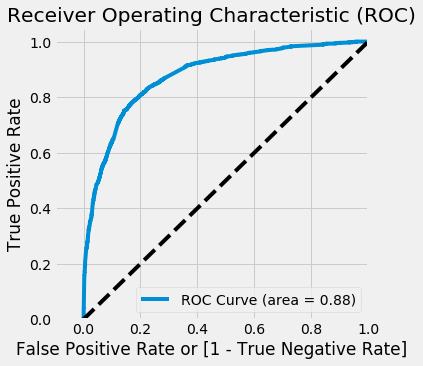

In [115]:
# Plotting ROC Curve

draw_curve(y_train_pred_final['Converted'], y_train_pred_final['Convert_prob'])

- ***Observations:***
- From the above ROC curve we can say that, threshold of 0.3 gives high true positive and low false positive
- Still we will calculate optimum cut-off point to confirm above observation

- **Finding optimal cutoff point**

In [116]:
nums = [x/10 for x in range(10)]
for i in nums:
    y_train_pred_final[i] = y_train_pred_final.Convert_prob.map(lambda x:\
                                                                1 if x > i else 0)
y_train_pred_final.head()

,Converted,Convert_prob,Status ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.238295,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.206471,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.278570,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.786013,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.238295,3934,0,1,1,1,0,0,0,0,0,0,0


In [117]:
# Calculating and printing Accuracy, Sensitivity and Specificity using various thresholds

cutoff_df = pd.DataFrame(columns=['prob','accuracy','sensi','speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    cm1 = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.578231  0.970803  0.336332
0.2   0.2  0.733457  0.919303  0.618941
0.3   0.3  0.795609  0.831306  0.773613
0.4   0.4  0.813080  0.761152  0.845077
0.5   0.5  0.812461  0.701135  0.881059
0.6   0.6  0.791280  0.583131  0.919540
0.7   0.7  0.777365  0.503650  0.946027
0.8   0.8  0.745826  0.380373  0.971014
0.9   0.9  0.711812  0.263585  0.988006


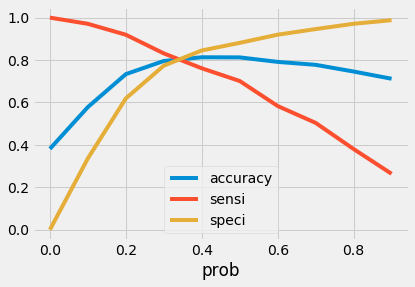

In [118]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- ***Observations:***
- The results look good, `Logistic Regression` model yields good results
- If we want better accuracy, more sensitivity and better specificity then threshold of 0.3 can be applied
- Since we have to know potential conversions, we need sensitivity to be more
- So we can go with `prob == 0.3` as by looking at the intersection of `Sensitivity`, `Accuracy` and `Specificity` we can say that it is around 80%
- We will use threshold of `0.3`

- **Applying metrics for `threshold == 0.3` on y_train**

In [119]:
# Using confusion matrix

CM = confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[0.3])
print(CM)

[[3096  906]
 [ 416 2050]]


In [120]:
# Checking Accuracy

accuracy_score(y_train_pred_final['Converted'], y_train_pred_final[0.3])

0.7956091527520099

In [121]:
# Checking Sensitivity

recall_score(y_train_pred_final['Converted'], y_train_pred_final[0.3])

0.8313057583130575

- ***Observations:***
- Accuracy is good i.e around 79.6%. Also, Sensitivity/Recall good as well i.e. around 83.13%
- We can see threshold of 0.3 gives required Sensitivity of around 80%. So, we will be using same threshold for test set as well

# 8. Predicting the Test Data

In [122]:
# Checking the head

X_test_scaled.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_No,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website
4269,1.433341,0.964504,2.892276,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0
2376,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
7766,0.512365,-0.777416,1.364995,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0
9199,-1.022595,-0.885371,-1.180474,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
4359,-1.022595,-0.885371,-1.180474,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0


In [123]:
# Checking shape

X_train_scaled.shape

(6468, 13)

In [124]:
# Using those features in 'X_test_scaled' which are in the final model

X_test_scaled = X_test_scaled[list(X_train_scaled.columns)]
X_test_scaled.head()

,Total Time Spent on Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,Specialization_Hospitality Management,What is your current occupation_Working Professional,Do Not Email_No,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website
4269,0.964504,0,0,0,0,0,1,0,0,1,0,0,0
2376,-0.885371,0,0,0,0,0,1,0,0,1,1,0,0
7766,-0.777416,0,0,0,0,0,0,0,1,1,0,0,0
9199,-0.885371,0,0,0,1,0,0,0,0,1,0,1,0
4359,-0.885371,0,0,0,0,0,0,0,0,1,1,0,0


In [125]:
X_test_scaled.shape

(2772, 13)

In [126]:
# Adding constant to 'X_test_scaled'

X_test_scaled_sm = sm.add_constant(X_test_scaled)

- **Predicting X_test**

In [127]:
# Predicting the 'X_test_scaled_sm'

y_test_pred = log_ml.predict(X_test_scaled_sm)
y_test_pred[:10]

4269    0.703951
2376    0.924169
7766    0.653190
9199    0.070130
4359    0.790574
9186    0.518462
1631    0.425108
8963    0.144154
8007    0.052598
5324    0.304986
dtype: float64

- **Creating a dataframe actual Converted flag and the predicted probabilities**

In [128]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Convert_prob':y_test_pred})
y_test_pred_final['Status ID'] = y_test.index
y_test_pred_final.head()

,Converted,Convert_prob,Status ID
4269,1,0.703951,4269
2376,1,0.924169,2376
7766,1,0.653190,7766
9199,0,0.070130,9199
4359,1,0.790574,4359


- **Creating new column 'Predicted' with 1 if Prob>0.30 else 0**

In [129]:
y_test_pred_final['Predicted'] = y_test_pred_final.Convert_prob.map(lambda x:\
                                                                    1 if x>0.30 else 0)
y_test_pred_final.head()

,Converted,Convert_prob,Status ID,Predicted
4269,1,0.703951,4269,1
2376,1,0.924169,2376,1
7766,1,0.653190,7766,1
9199,0,0.070130,9199,0
4359,1,0.790574,4359,1


In [130]:
# Using confusion matrix

CM = confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])
print(CM)

[[1306  371]
 [ 188  907]]


In [131]:
# Checking Accuracy

accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])

0.7983405483405484

In [132]:
# Checking Sensitivity

recall_score(y_test_pred_final['Converted'], y_test_pred_final['Predicted'])

0.828310502283105

- ***Observations:***
- Accuracy is good i.e around 79.83%. Also, Sensitivity/Recall good as well i.e. around 82.83%
- We used same threshold of 0.3 on test set as well and it gives required Sensitivity of around 80%

# 9. Assigning Lead Score to Train and Test Data

- **Assigning Lead score to X_train**

In [133]:
X_train = X_train.copy()
X_train['Lead Score'] = y_train_pred*100

In [134]:
X_train['Lead Score'] = round(X_train['Lead Score'], 2)

In [135]:
X_train = X_train.sort_values(by= 'Lead Score', ascending = False)
X_train.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_No,Do Not Email_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Score
2656,59996c52-d485-48c6-9777-d8deaec1e4ab,3.0,1721,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.95
8074,20bae5db-2d10-4d69-90d0-65a389adb418,3.0,1650,2.0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.94
8057,64a74f2c-6985-42c8-aa98-635c9afa6753,3.0,711,2.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.93
3428,5461778b-3604-4675-90f5-d997fe11bc29,3.0,1447,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.91
7579,5b352d64-886d-471e-9339-cfd1b7f9207c,3.0,1357,2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.89


- **Assigning Lead score to X_test**

In [136]:
X_test = X_test.copy()
X_test['Lead Score'] = y_test_pred*100

In [137]:
X_test['Lead Score'] = round(X_test['Lead Score'], 2)

In [138]:
X_test = X_test.sort_values(by= 'Lead Score', ascending = False)
X_test.head()

,Prospect ID,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Others,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Do Not Email_No,Do Not Email_Yes,A free copy of Mastering The Interview_No,A free copy of Mastering The Interview_Yes,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Lead Score
3478,59d2f9c6-d03e-4c51-8324-0c76feb19df6,3.0,1687,2.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.95
6383,17868ac7-71a8-49a7-8aa0-deea12139b71,3.0,1660,2.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.94
818,4cb2a48d-e9d2-4845-acb1-baaad08c8c07,16.0,1570,5.33,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.93
5921,bb3840bf-b040-45f3-a494-68927055dbb1,3.0,1385,2.00,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.90
4613,240134a6-7917-4a71-a0ac-909d9f055148,4.0,1144,1.33,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,99.84


- **Conclusion**
- As per our model, it will give the good performance with to selection of the customer on the conversion and join to our organization. With our lead scores provide by the model with respect to probability to conversion of the customer, which save the time spend on the phone call to select the customer which will going to convert soon and join the organization. It will save the money also with respect to the business aspect.  Using our model, it will resolve the problem of unnecessary phone calls and time spend by the sales team previously.